### OVERVIEW

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact with the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. The project (Code) analyzes the prior marketing campaign data of a Portuguese bank and aims to predict whether the customer will subscribe to fixed-term deposit products the bank is offering.

### Approach

In order to optimize marketing campaigns with the help of the dataset, we will have to take the following steps:

1. Import data from the dataset and perform the initial high-level analysis: look at the number of rows, look at the missing values, and look at dataset columns and their values respective to the campaign outcome.

2. Clean the data: remove irrelevant columns, deal with missing and incorrect values, and turn categorical columns into dummy variables.

3. Use machine learning techniques to predict the marketing campaign outcome and to find out factors, which affect the success of the campaign.

### PROCESS FLOW

1. Exploratory data analysis
2. Missing and duplicate value analysis
3. Outlier analysis
4. Visualization
5. Correlation analysis
5. Feature engineering
6. Grid Search/Modeling
7. Regression Analysis/Predictions
8. Conclusion

### Importing required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle

### Loading the Dataset

In [2]:
df = pd.read_csv('bank-full.csv', delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Dataset Description

The dataset contains 17 attributes including one dependent attribute and there are 45211 instances/datapoints. So we have 16 predictor/independent attributes and 1 dependent attribute.

### Input variables:

#### Bank client attributes:

    1. age (numeric)
    2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",                             "blue-collar","self-employed","retired","technician","services") 
    3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
    4. education (categorical: "unknown","secondary","primary","tertiary")
    5. default: has credit in default? (binary: "yes","no")
    6. balance: average yearly balance, in euros (numeric) 
    7. housing: has housing loan? (binary: "yes","no")
    8. loan: has personal loan? (binary: "yes","no")
    
#### Related with the last contact of the current campaign:

    9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
    10. day: last contact day of the month (numeric)
    11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    12. duration: last contact duration, in seconds (numeric)
    
#### Other attributes:

    13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1                    means client was not previously contacted)
    15. previous: number of contacts performed before this campaign and for this client (numeric)
    16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

#### Output variable (desired target):

    17. y - has the client subscribed a term deposit? (binary: "yes","no")

### 1. Exploratory Data Analysis

In [3]:
# data description of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# total number of rows and columns in the data set
df.shape

(45211, 17)

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
# statistical information of the data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Mean age is 41 years, while minmum is 18 and max is 95.

The mean duration of call is 258 sec(4.3 min) while max is 4918 sec(81 min).

### 2. Missing and Duplicate Value Analysis

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [9]:
# check for duplicate values
df.duplicated().sum()

0

#### Dataset doesn't have any duplicate rows.

In [10]:
# unique values in each column
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [11]:
# check for null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Dataset doesn't have null values either.

In [12]:
# unique values of column job
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [13]:
# count of unique values
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

#### Job column has 288 unknown values.

In [14]:
# unique value of marital column
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [15]:
# unique value of education column
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [16]:
# count of unique values of education column 
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

#### Education column has 1857 unknown values.

In [17]:
# unique values of contact column
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [18]:
# count of unique values of contact
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [19]:
# unique values of poutcome column
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [20]:
# count of unique values of poutcome
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [21]:
# replacing the unknown values of job and education with mode of the respective columns.
df['job'] = df['job'].replace('unknown', df['job'].mode()[0])
df['education'] = df['education'].replace('unknown', df['education'].mode()[0])

In [22]:
# dataset after replacing the values
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,blue-collar,single,secondary,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### 3. Outlier Analysis

<AxesSubplot:>

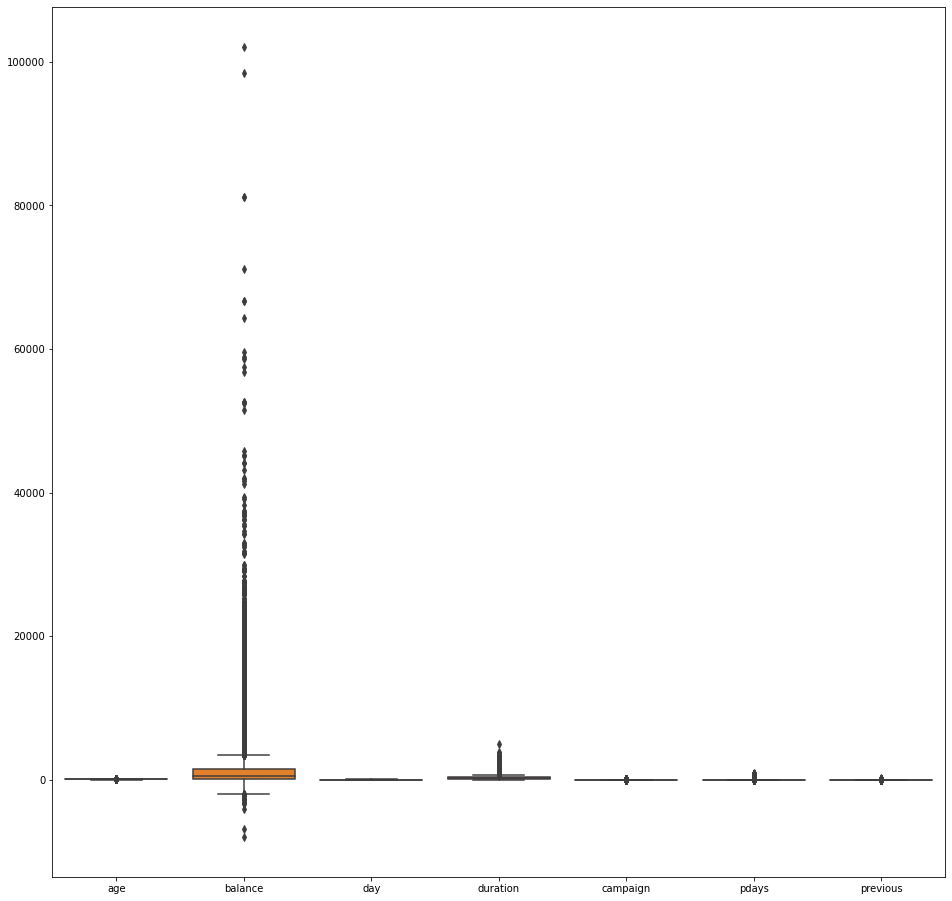

In [23]:
# Creating boxplot of numerical data to find out outliers
fig, ax = plt.subplots(figsize = (16,16))
sns.boxplot(data = df, ax = ax)

In [24]:
# Keeping 95th percentile of data to remove the outliers
q = df['duration'].quantile(.95)
df_new = df[df['duration'] < q]

In [25]:
# Shape of new dataset after removing 5th percentile of data
df_new.shape

(42949, 17)

<AxesSubplot:>

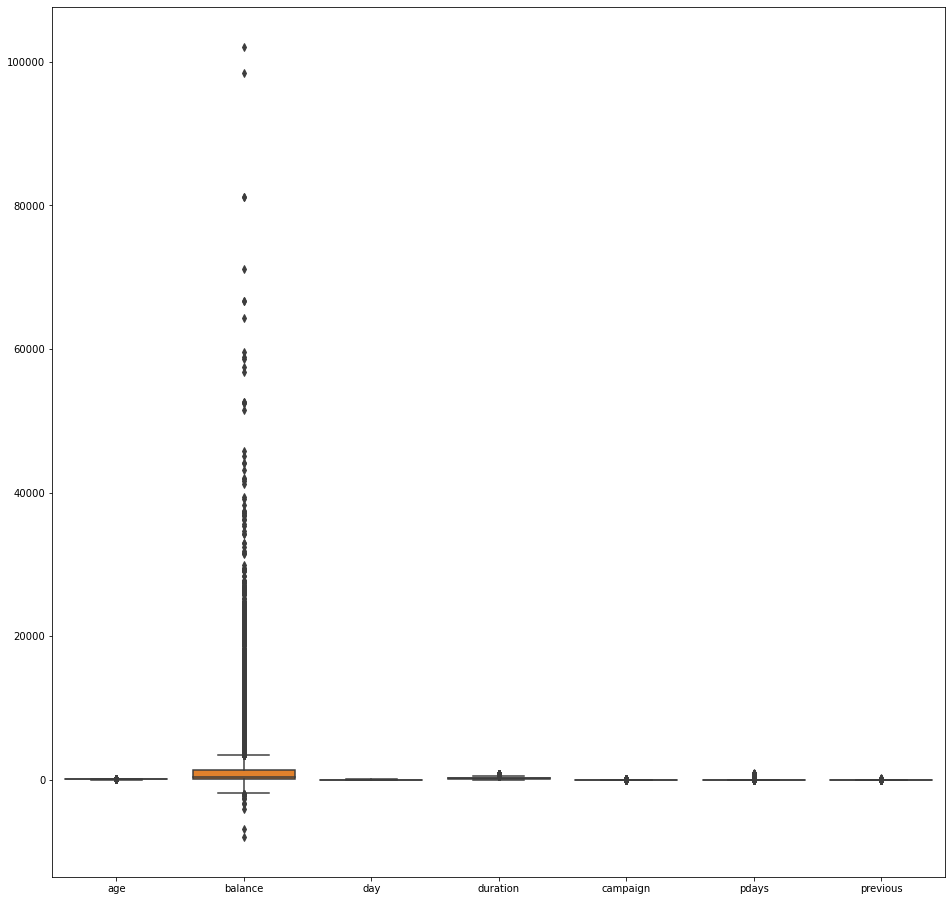

In [26]:
# Boxplot after removing 5th percentile of data
fig, ax = plt.subplots(figsize = (16,16))
sns.boxplot(data = df_new, ax = ax)

#### Most of the outliers from duration column are removed after removing 5th percentile of dataset.

### 4. Visualization 

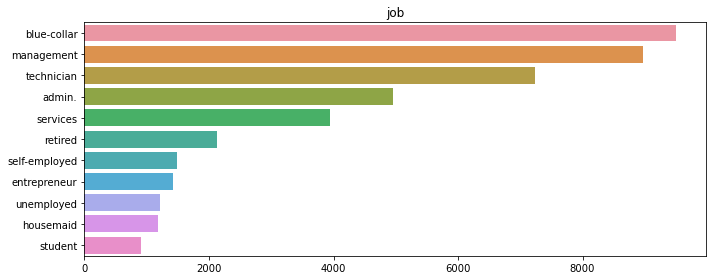

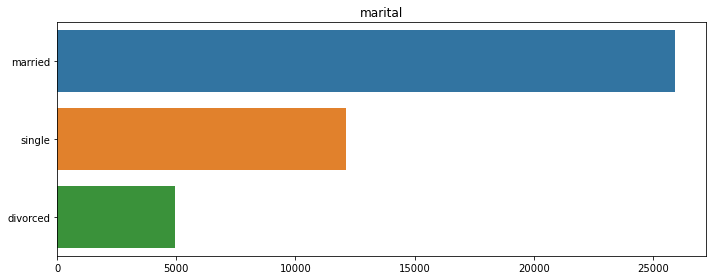

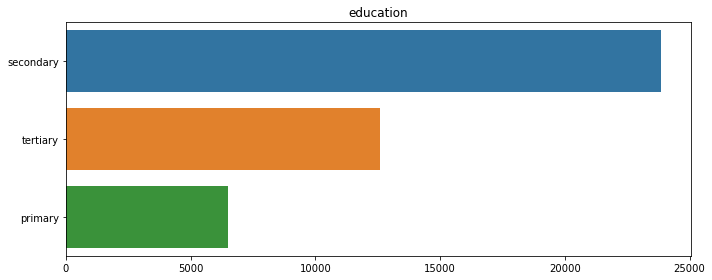

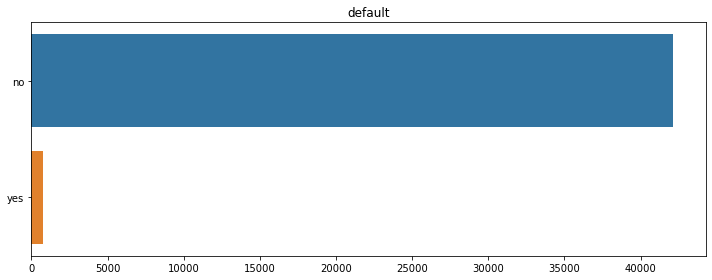

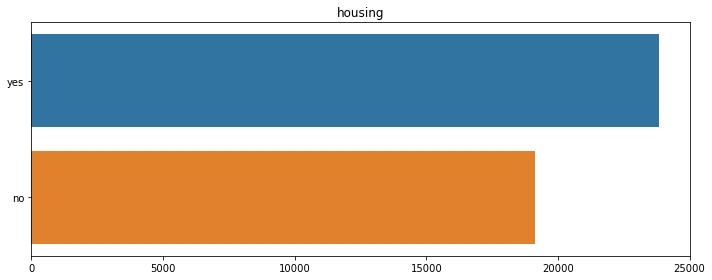

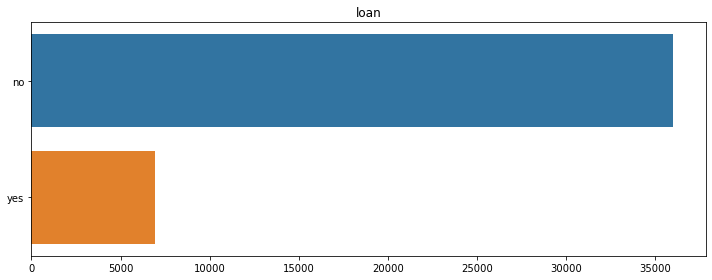

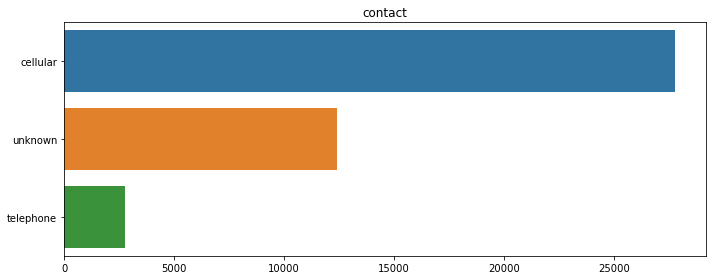

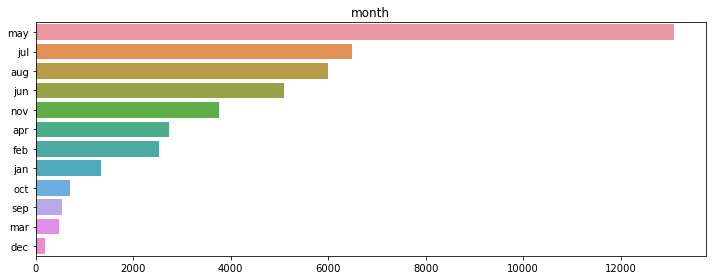

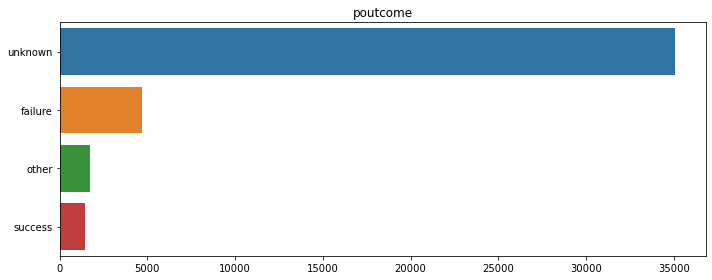

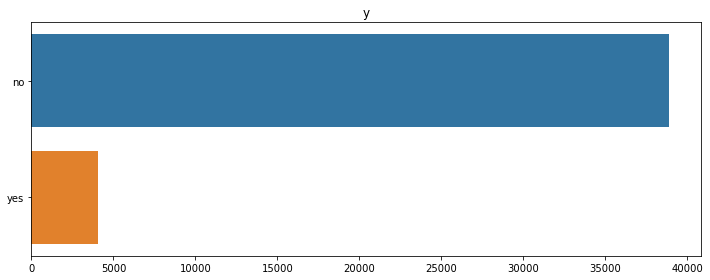

In [27]:
categorical_columns = ['job', 'marital', 'education','default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in categorical_columns:
    plt.figure(figsize=(10,4))
    sns.barplot(df_new[col].value_counts().values, df_new[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

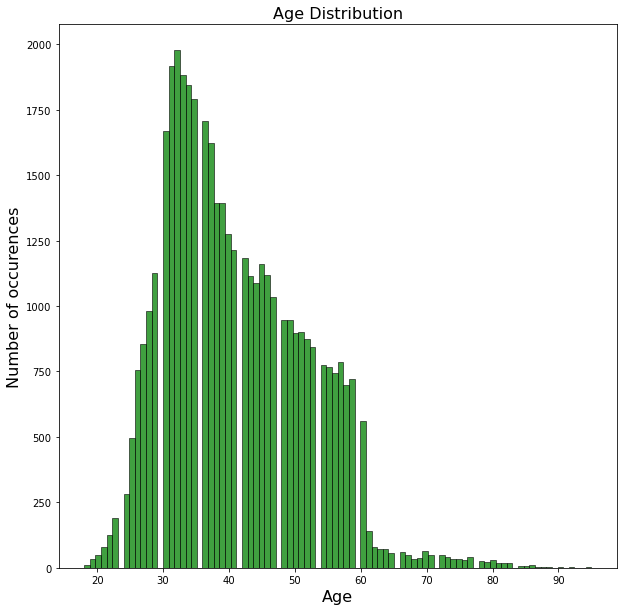

In [28]:
# Bar graph to represent the age distribution
plt.figure(figsize = (10,10))
plt.title("Age Distribution", fontsize = 16)
plt.xlabel('Age', fontsize = 16)
plt.ylabel("Number of occurences", fontsize = 16)
sns.histplot(df_new["age"], color = "green")
plt.show()

y
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

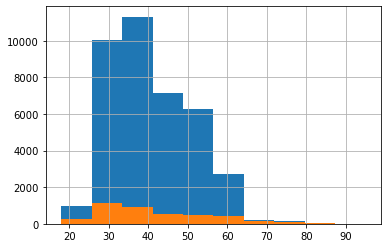

In [29]:
# Age comparison with respect to subscription
df_new.groupby('y').age.hist()

In [30]:
# Histogram to represent the distribution of data in each categorical column
def plot_hist(df_new, feature):
    plt.hist(df_new[feature], bins = 50)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title('{} distribution with hist'.format(feature))
    plt.show()

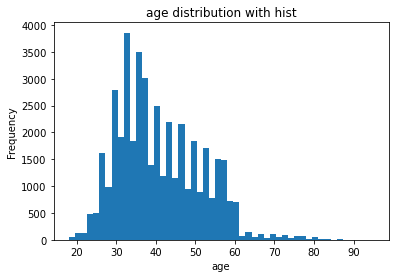

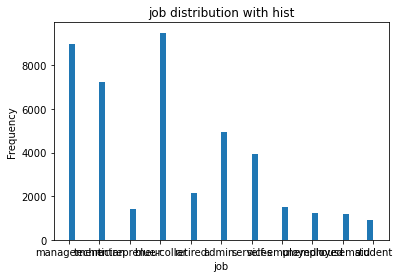

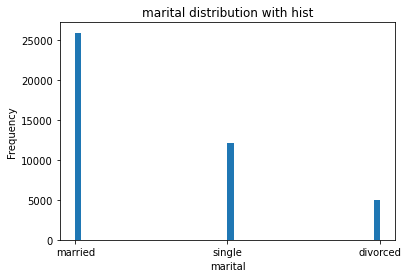

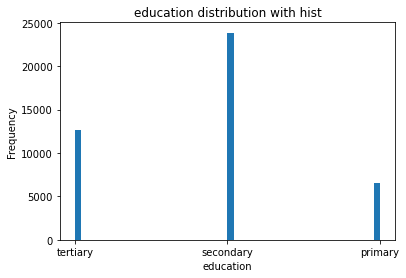

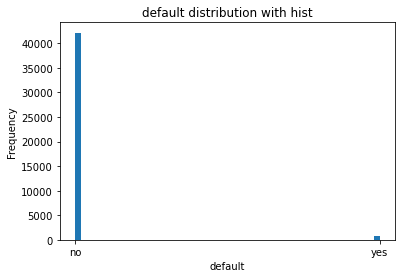

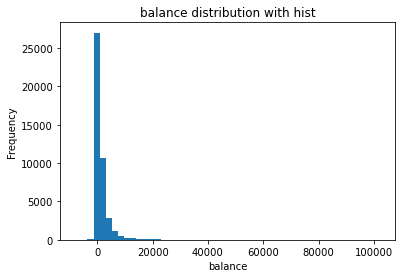

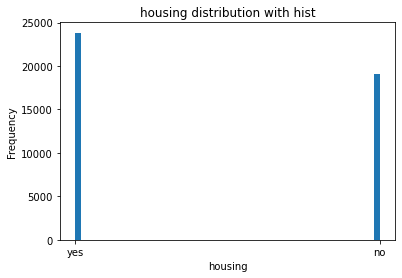

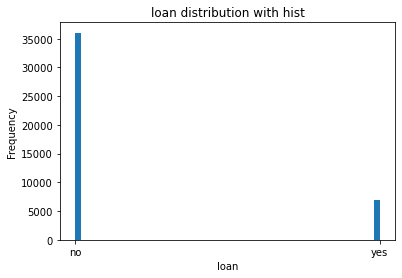

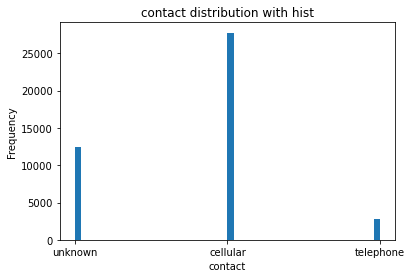

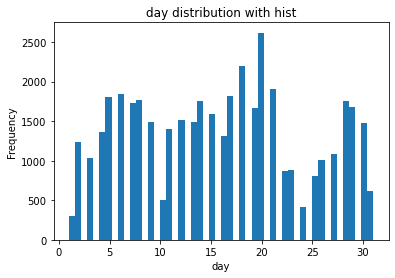

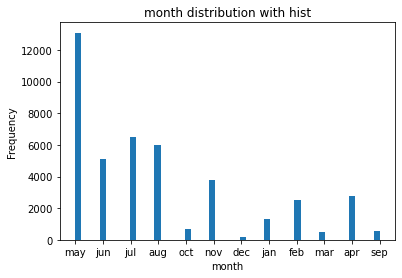

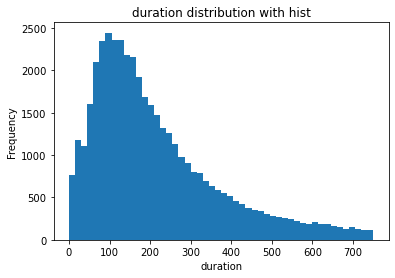

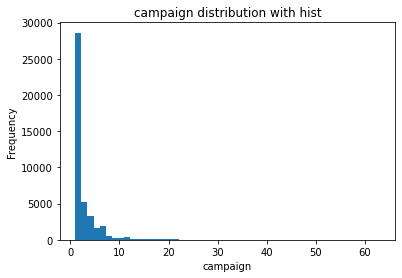

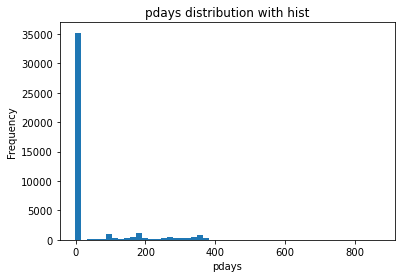

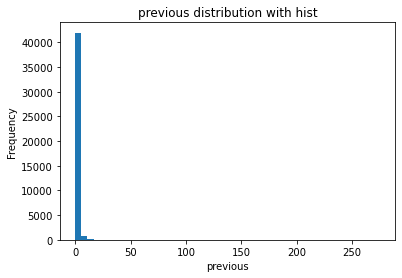

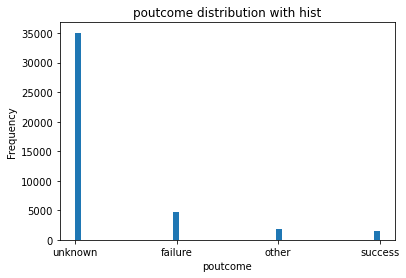

In [31]:
for n in df_new.columns[:-1]:
    plot_hist(df_new,n)

In [109]:
def plot_pdf(df_new, feature):
    g = sns.FacetGrid(df_new, hue='y', size=5)
    g.map(sns.distplot, feature)
    plt.legend()
    plt.title(f'PDF of {feature} for target variable y')

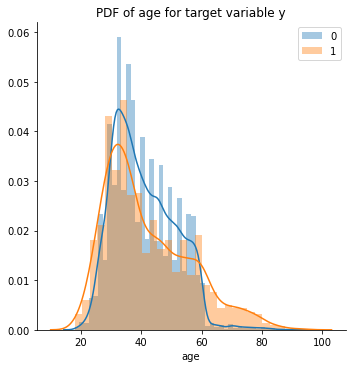

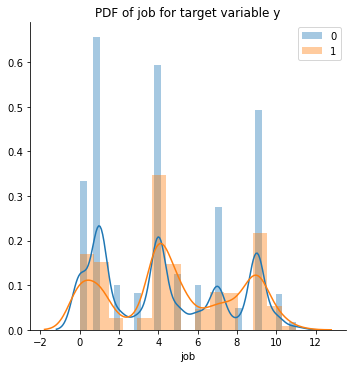

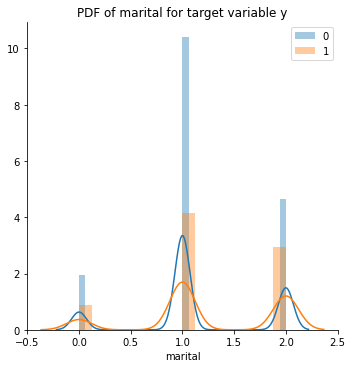

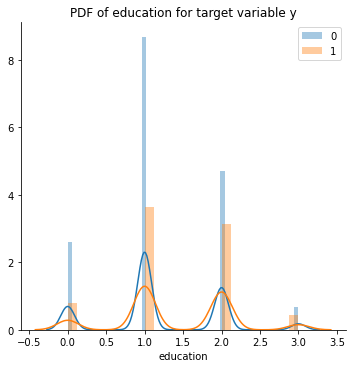

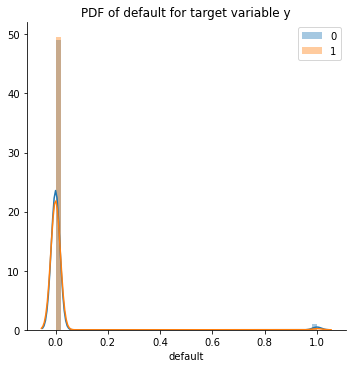

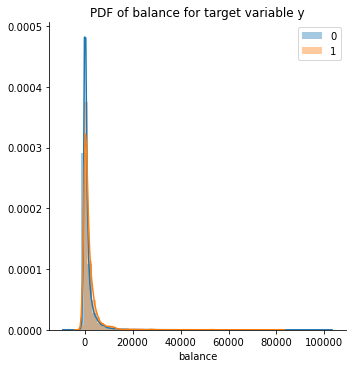

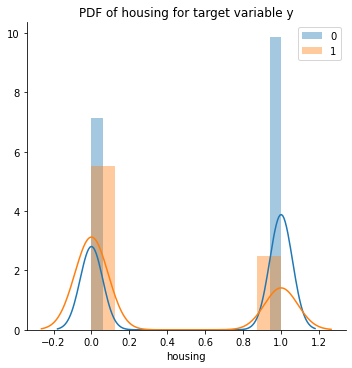

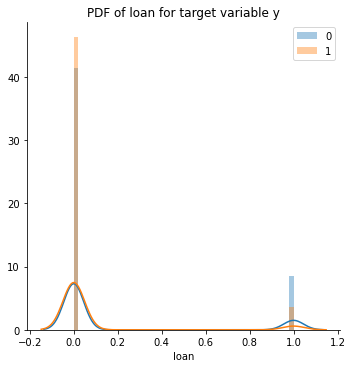

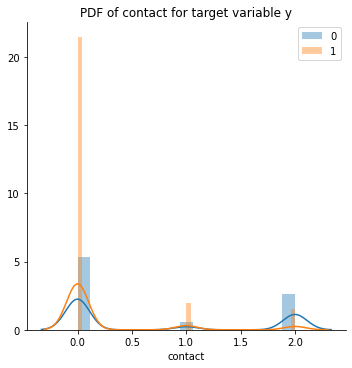

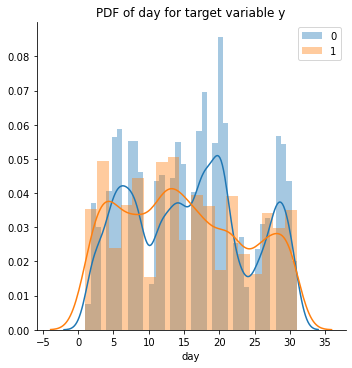

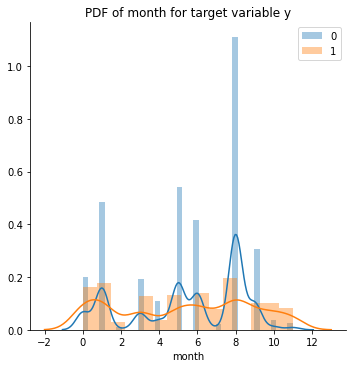

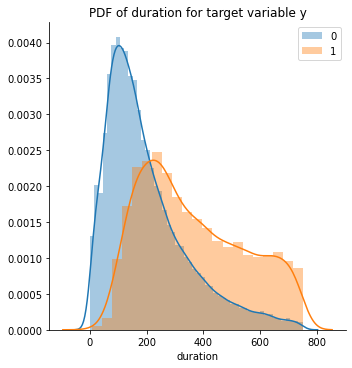

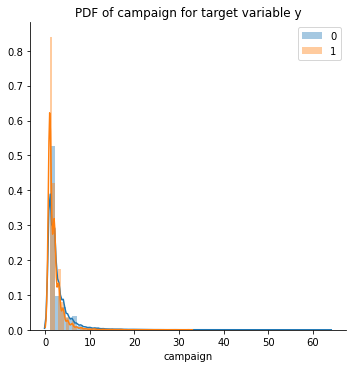

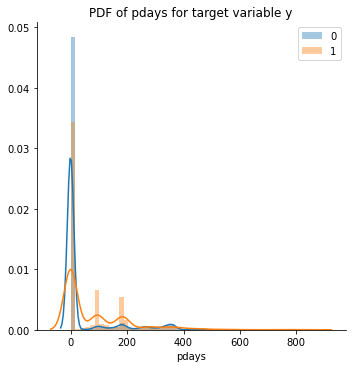

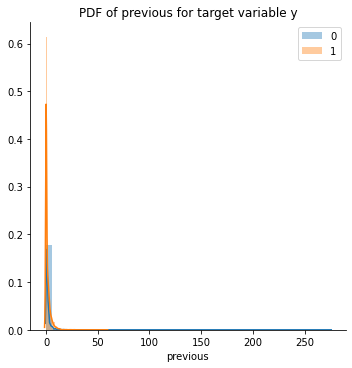

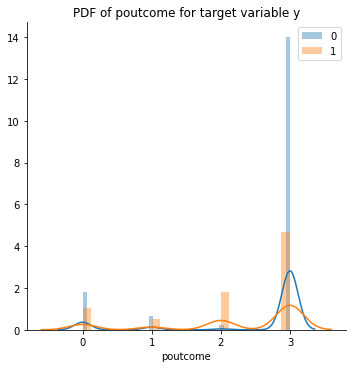

In [110]:
for i in df_new.columns[:-1]:
    plot_pdf(df_new, i)

In [32]:
# Percentage of value count of unique values of job column
df_new['job'].value_counts()/len(df_new)*100

blue-collar      22.121586
management       20.903863
technician       16.833919
admin.           11.553238
services          9.187641
retired           4.950057
self-employed     3.464574
entrepreneur      3.303919
unemployed        2.840578
housemaid         2.735803
student           2.104822
Name: job, dtype: float64

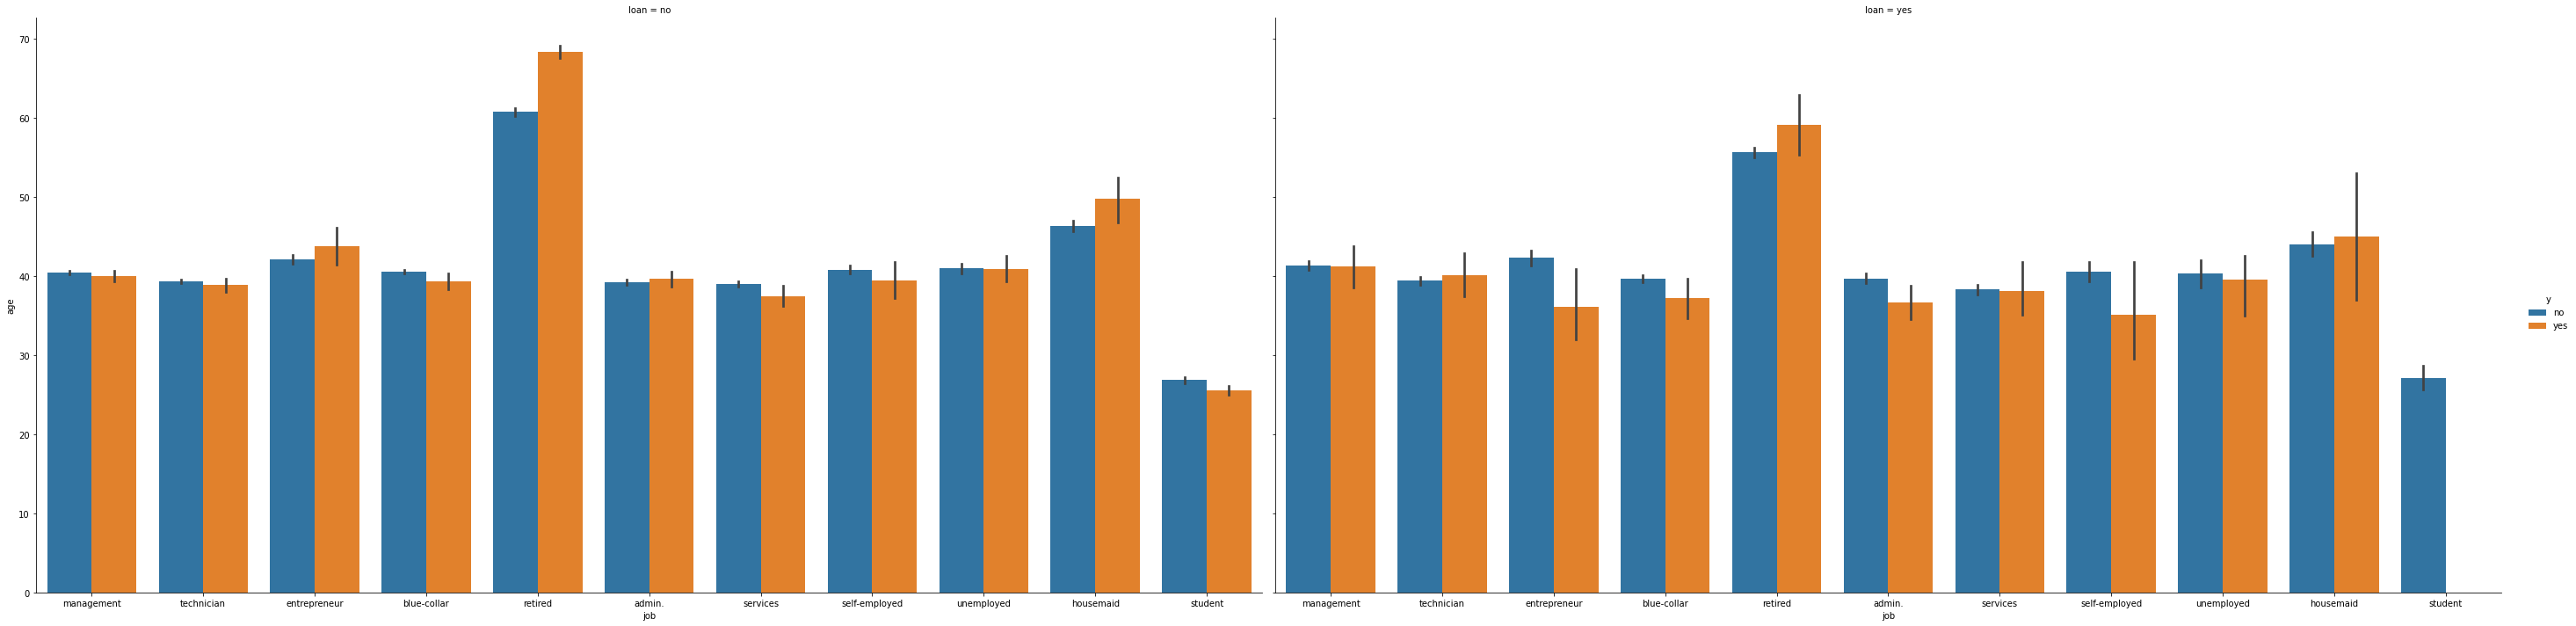

In [34]:
# Relationship between job, age and loan
sns.catplot(x='job', y = 'age', data = df_new, hue = 'y',
               kind = 'bar', col = 'loan', height = 10, aspect = 2)

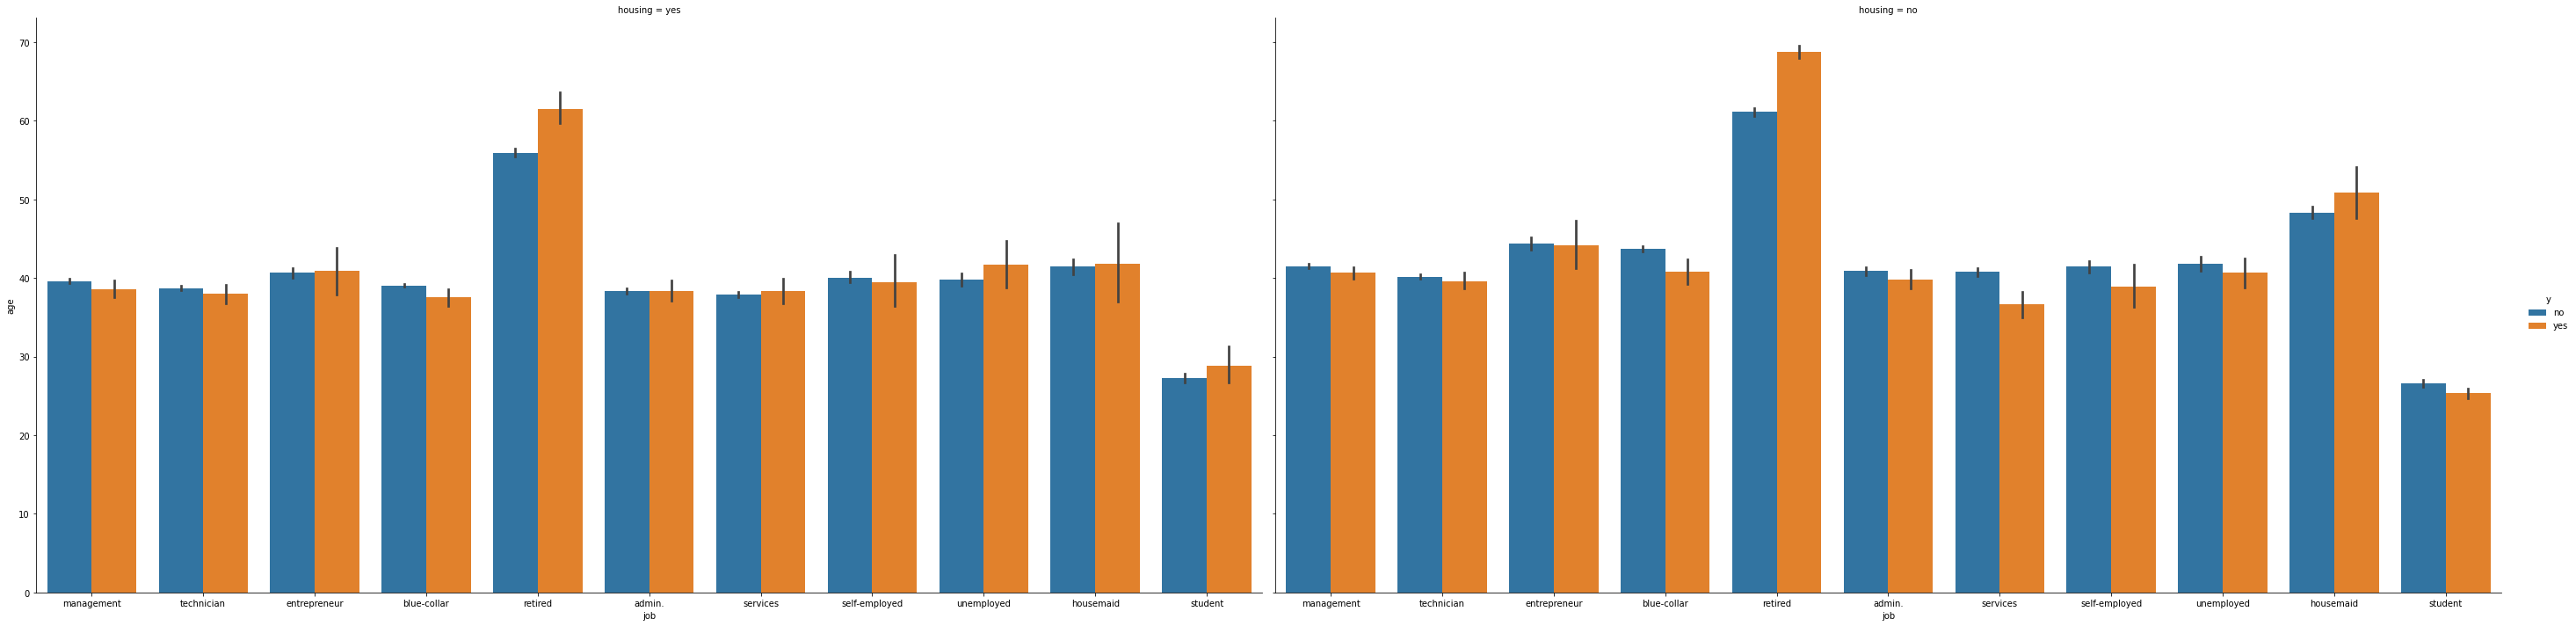

In [35]:
# Relationship between job, age and housing
sns.catplot(x='job', y = 'age', data = df_new, hue = 'y',
               col = 'housing', kind = 'bar', height = 10, aspect = 2)

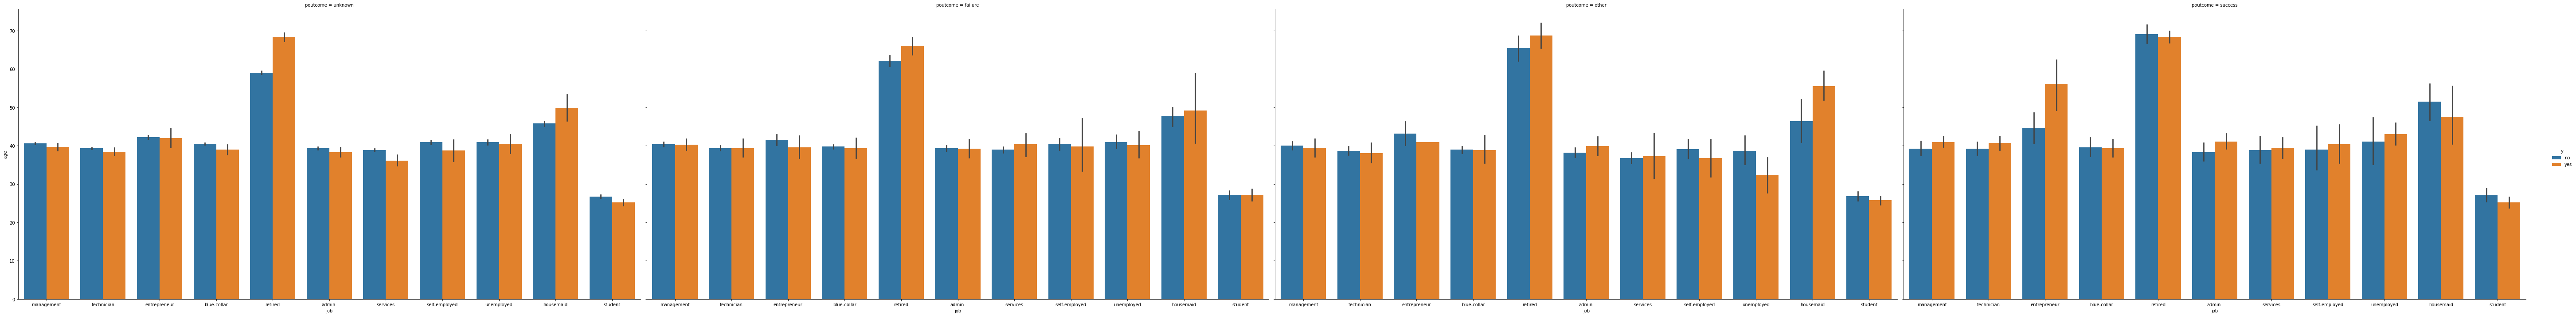

In [36]:
# Relationship between job, age and poutcome
sns.catplot(x='job', y = 'age', data = df_new, hue = 'y',
                col = 'poutcome', kind = 'bar', height = 10, aspect = 2)

In [37]:
# Percentage of value count of unique values of marital column
df_new['marital'].value_counts()/len(df_new)*100

married     60.343663
single      28.175278
divorced    11.481059
Name: marital, dtype: float64

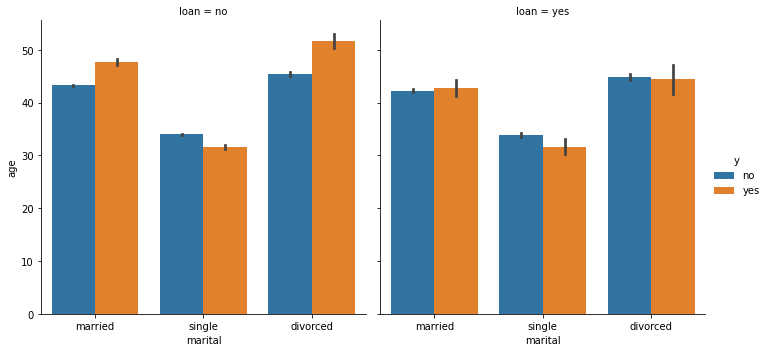

In [38]:
# Relationship between marital, age and loan
sns.catplot(x = 'marital', y = 'age', data = df_new,
            hue = 'y', col = 'loan', kind = 'bar')

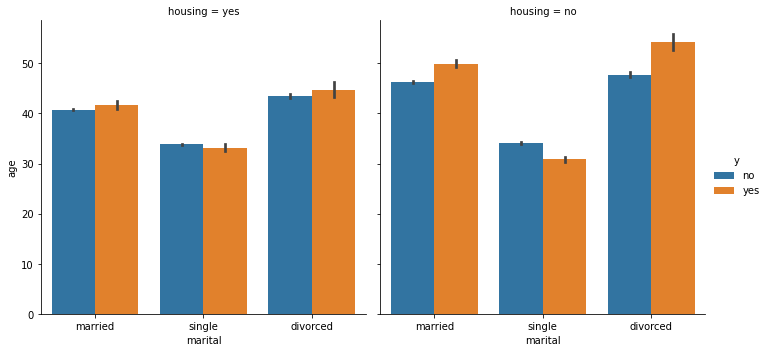

In [39]:
# Relationship between marital, age and housing
sns.catplot(x = 'marital', y = 'age', data = df_new,
            hue = 'y', col = 'housing', kind = 'bar')

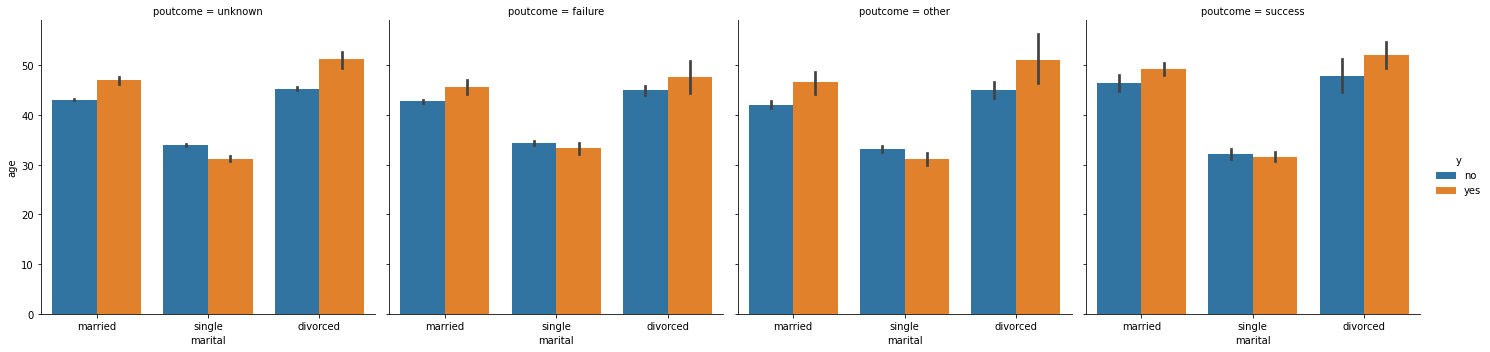

In [40]:
# Relationship between marital, age and poutcome
sns.catplot(x = 'marital', y = 'age', data = df_new,
           hue = 'y', col = 'poutcome', kind = 'bar')

In [41]:
# Percentage of value count of unique values of education column
df_new['education'].value_counts()/len(df_new)*100

secondary    55.544949
tertiary     29.339449
primary      15.115602
Name: education, dtype: float64

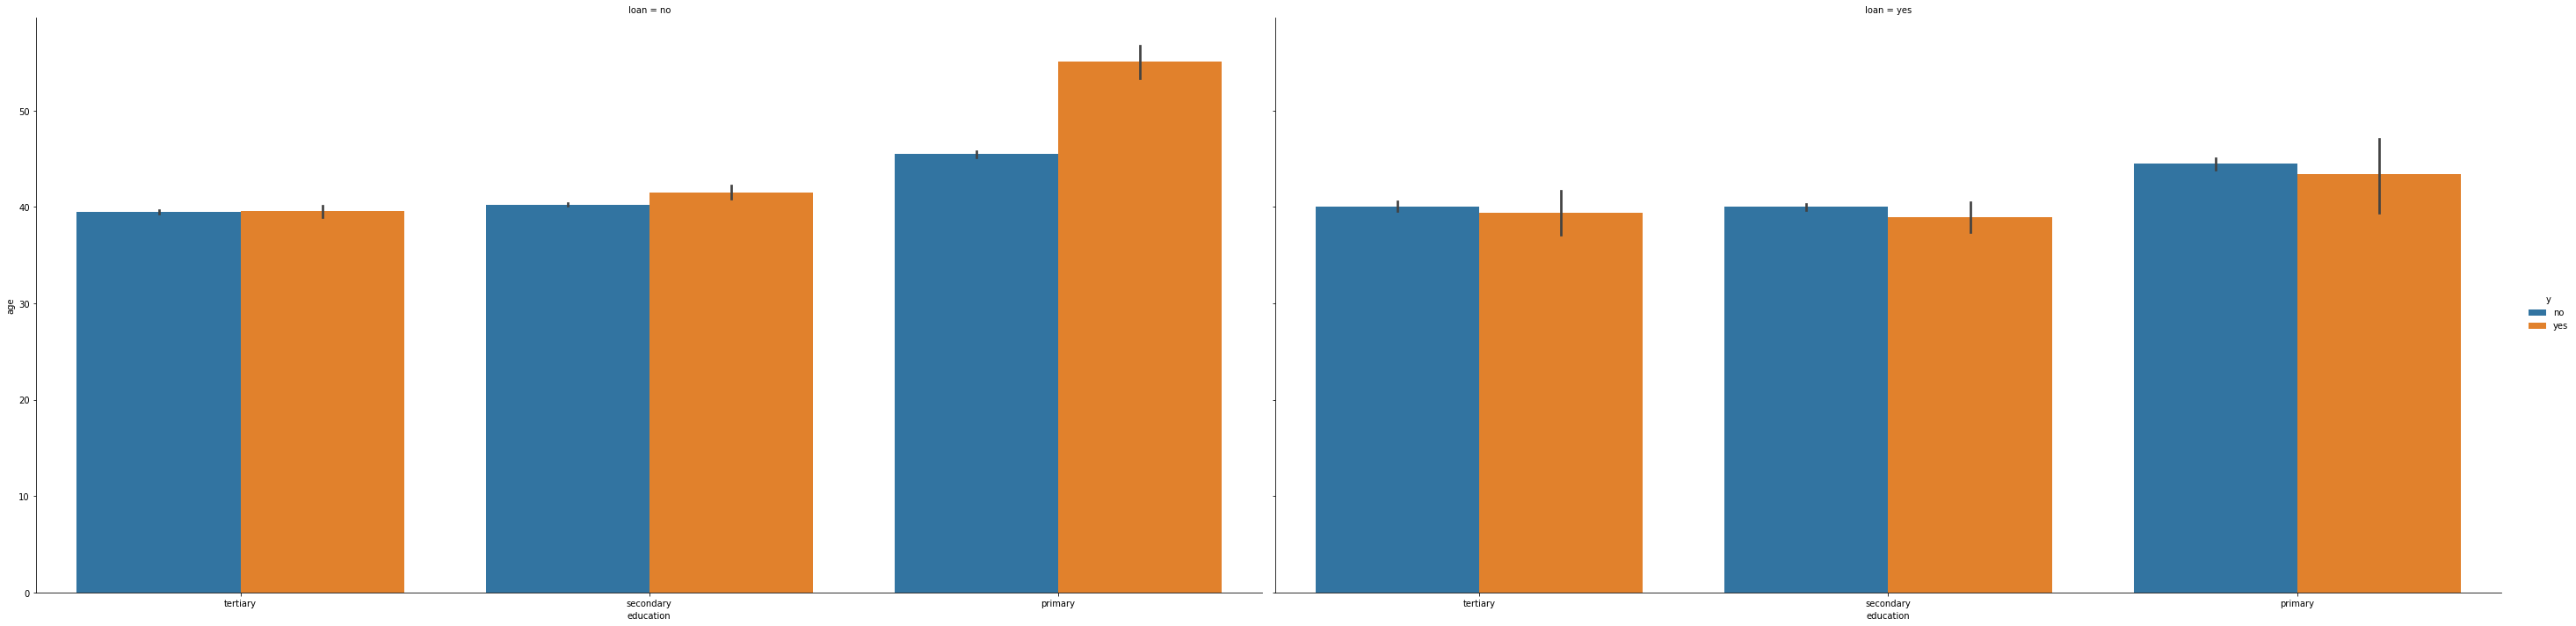

In [42]:
# Relationship between education, age and loan
sns.catplot(x = 'education', y = 'age', data = df_new,
           hue = 'y', col = 'loan', kind = 'bar', height = 10, aspect = 2)

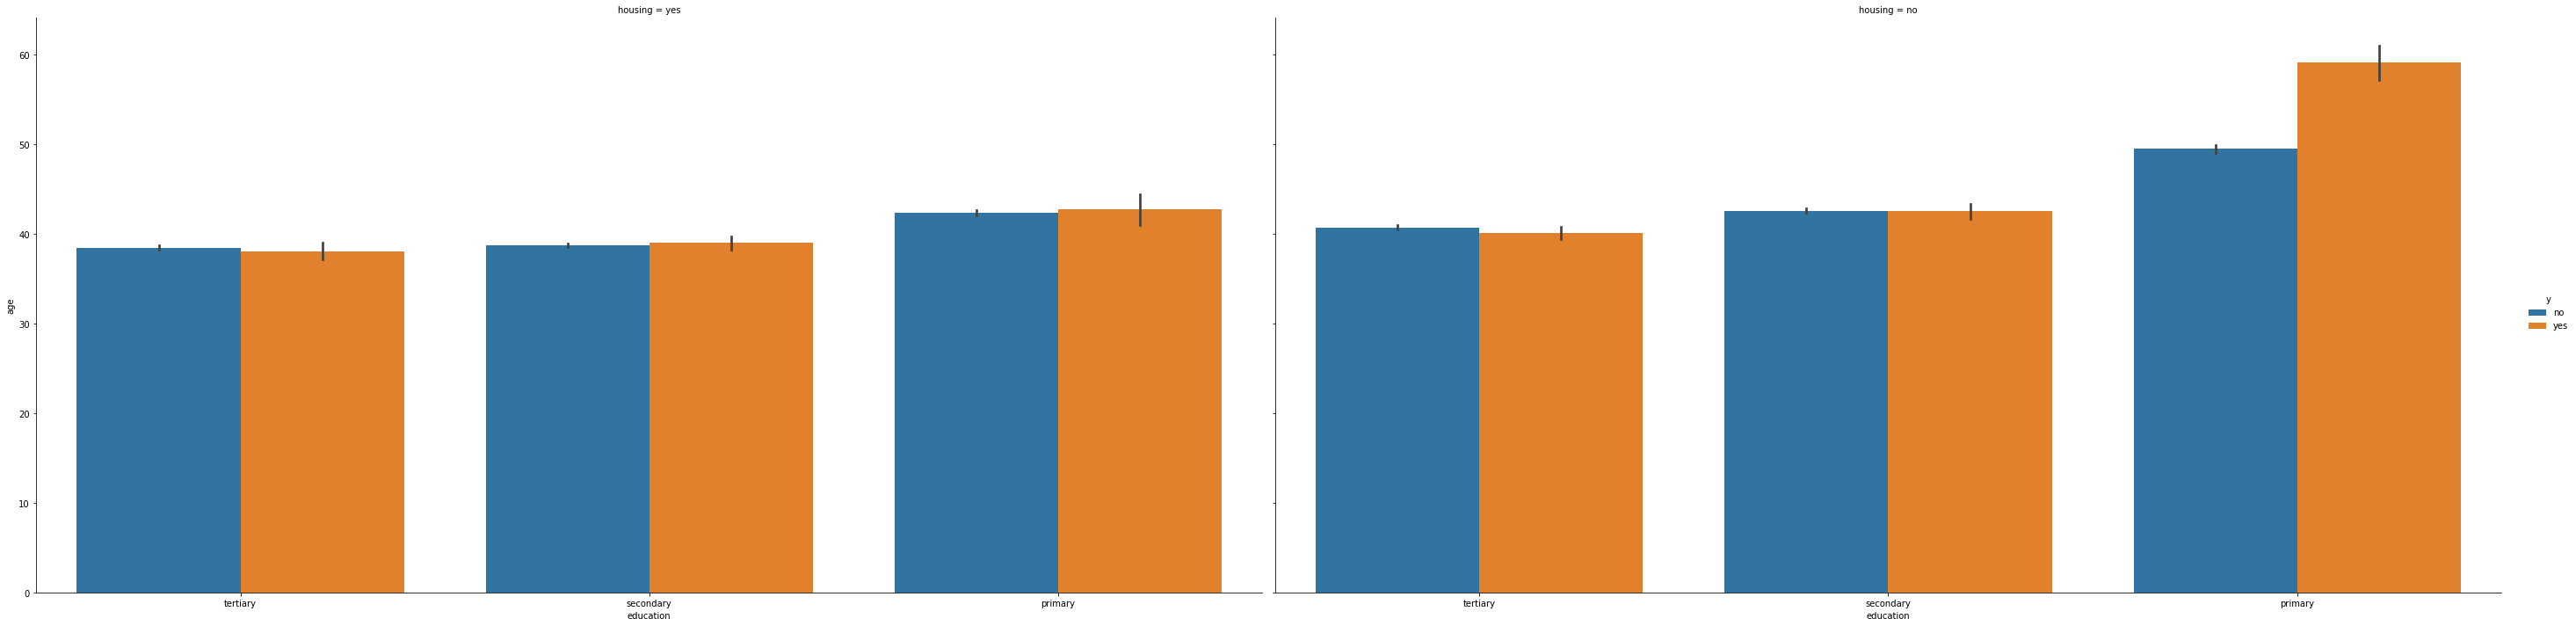

In [43]:
# Relationship between education, age and housing
sns.catplot(x = 'education', y = 'age', data = df_new, hue = 'y',
           col = 'housing', kind = 'bar', height = 10, aspect = 2)

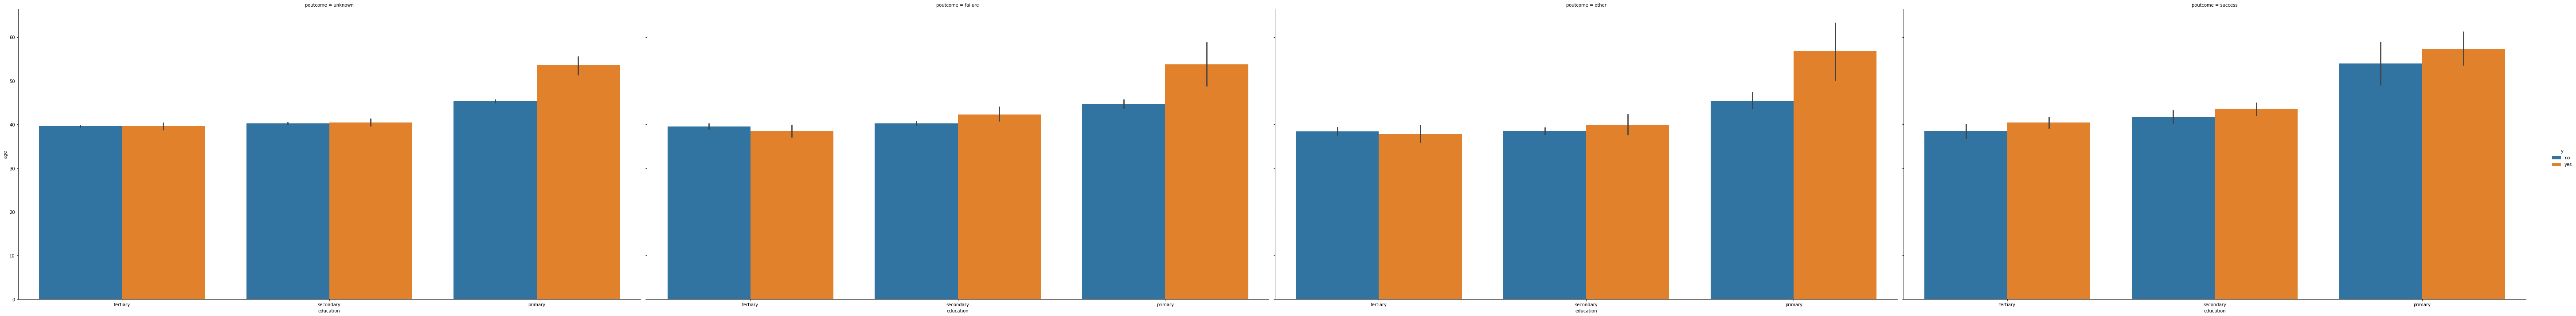

In [44]:
# Relationship between education, age and poutcome
sns.catplot(x = 'education', y = 'age', data = df_new, hue = 'y',
           col = 'poutcome', kind = 'bar', height = 10, aspect = 2)

In [45]:
# Value count of loan
df_new['loan'].value_counts()

no     36041
yes     6908
Name: loan, dtype: int64

In [46]:
# Value count of month
df_new['month'].value_counts()

may    13088
jul     6483
aug     5996
jun     5096
nov     3763
apr     2742
feb     2534
jan     1338
oct      700
sep      545
mar      466
dec      198
Name: month, dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

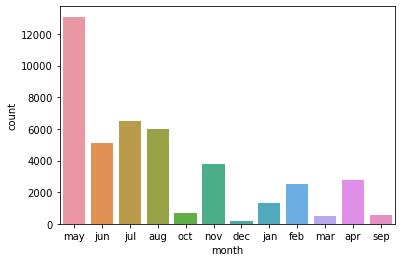

In [47]:
# Countplot of month
labels = ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb','mar', 'apr', 'sep']
sns.countplot(x = 'month', data = df_new, order = labels)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

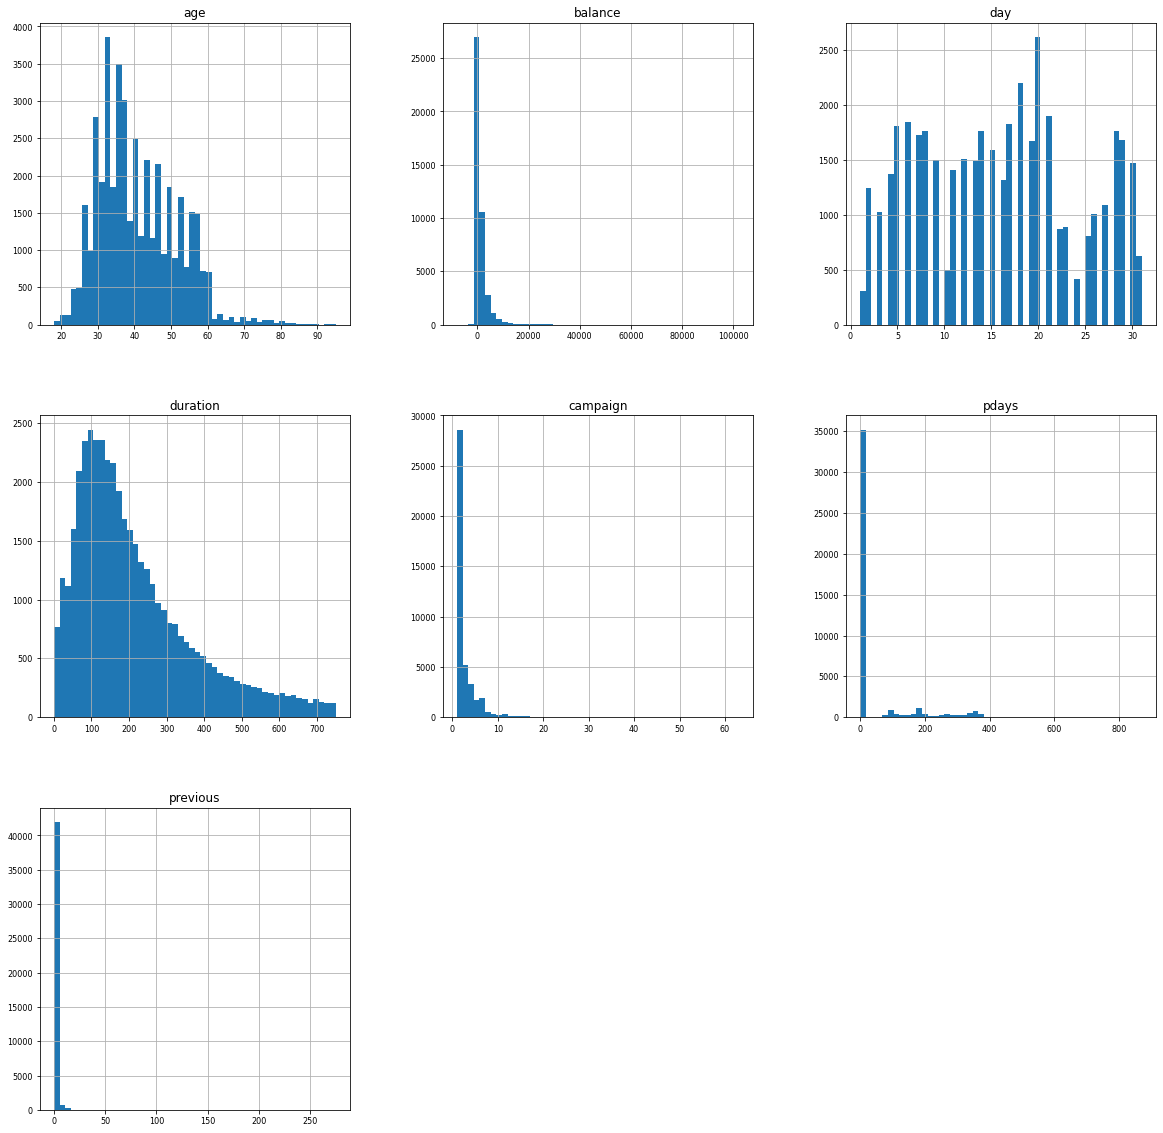

In [48]:
# Distribution of categorical columns
df_new.hist(figsize = (20, 20), bins = 50, xlabelsize=8, ylabelsize=8)

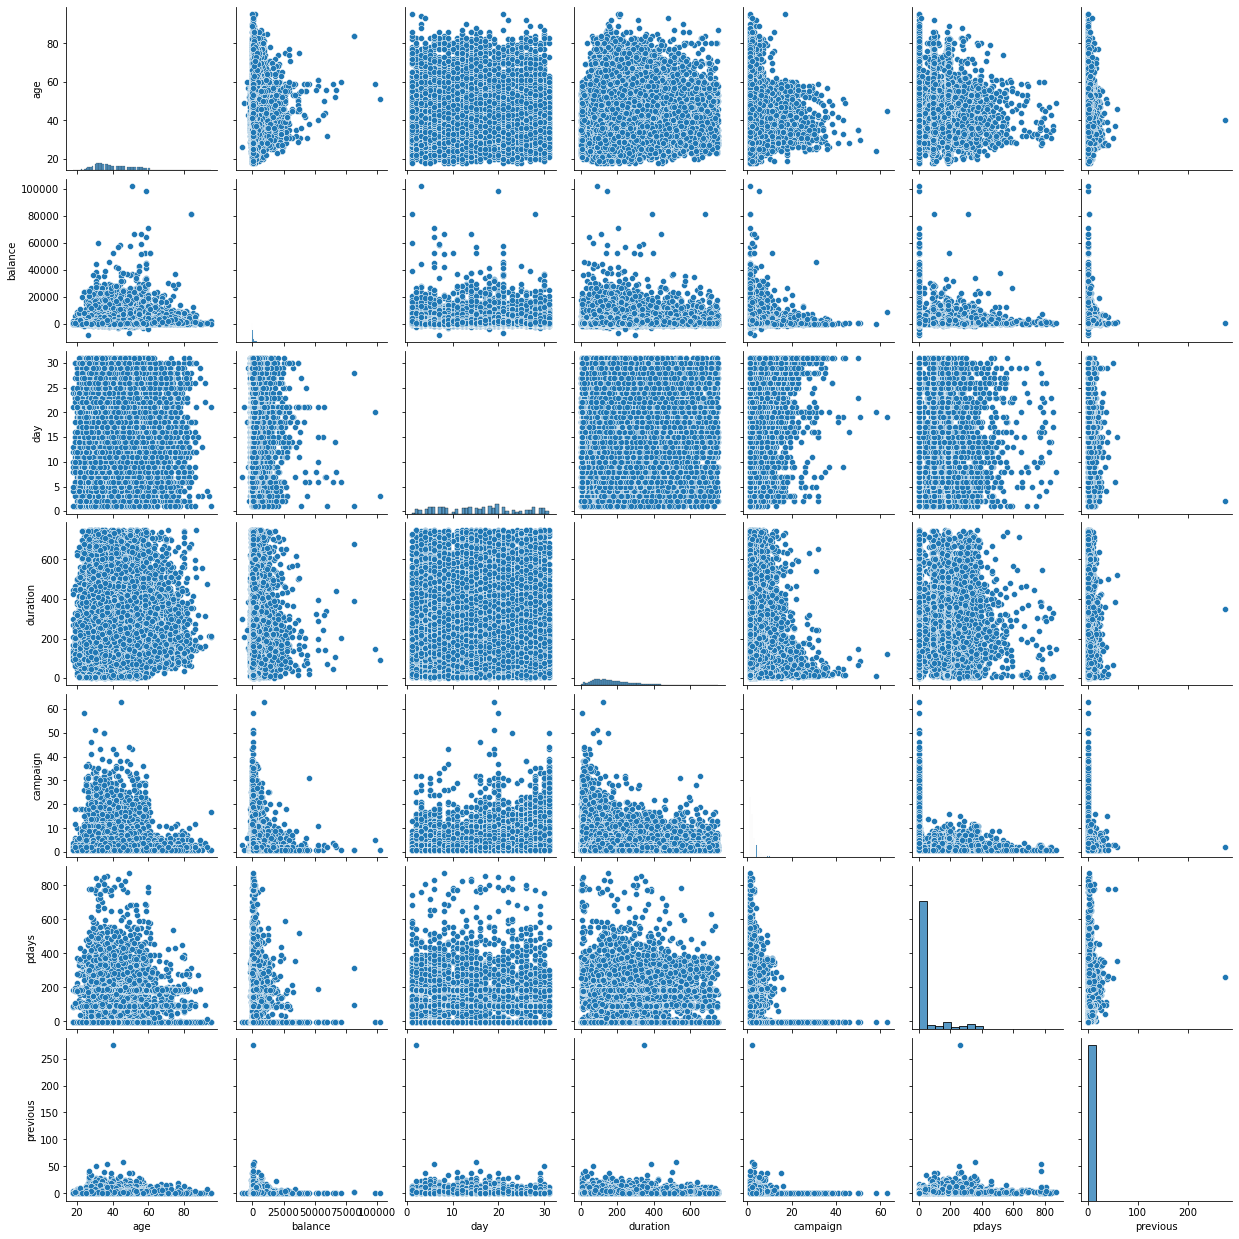

In [49]:
sns.pairplot(df_new)

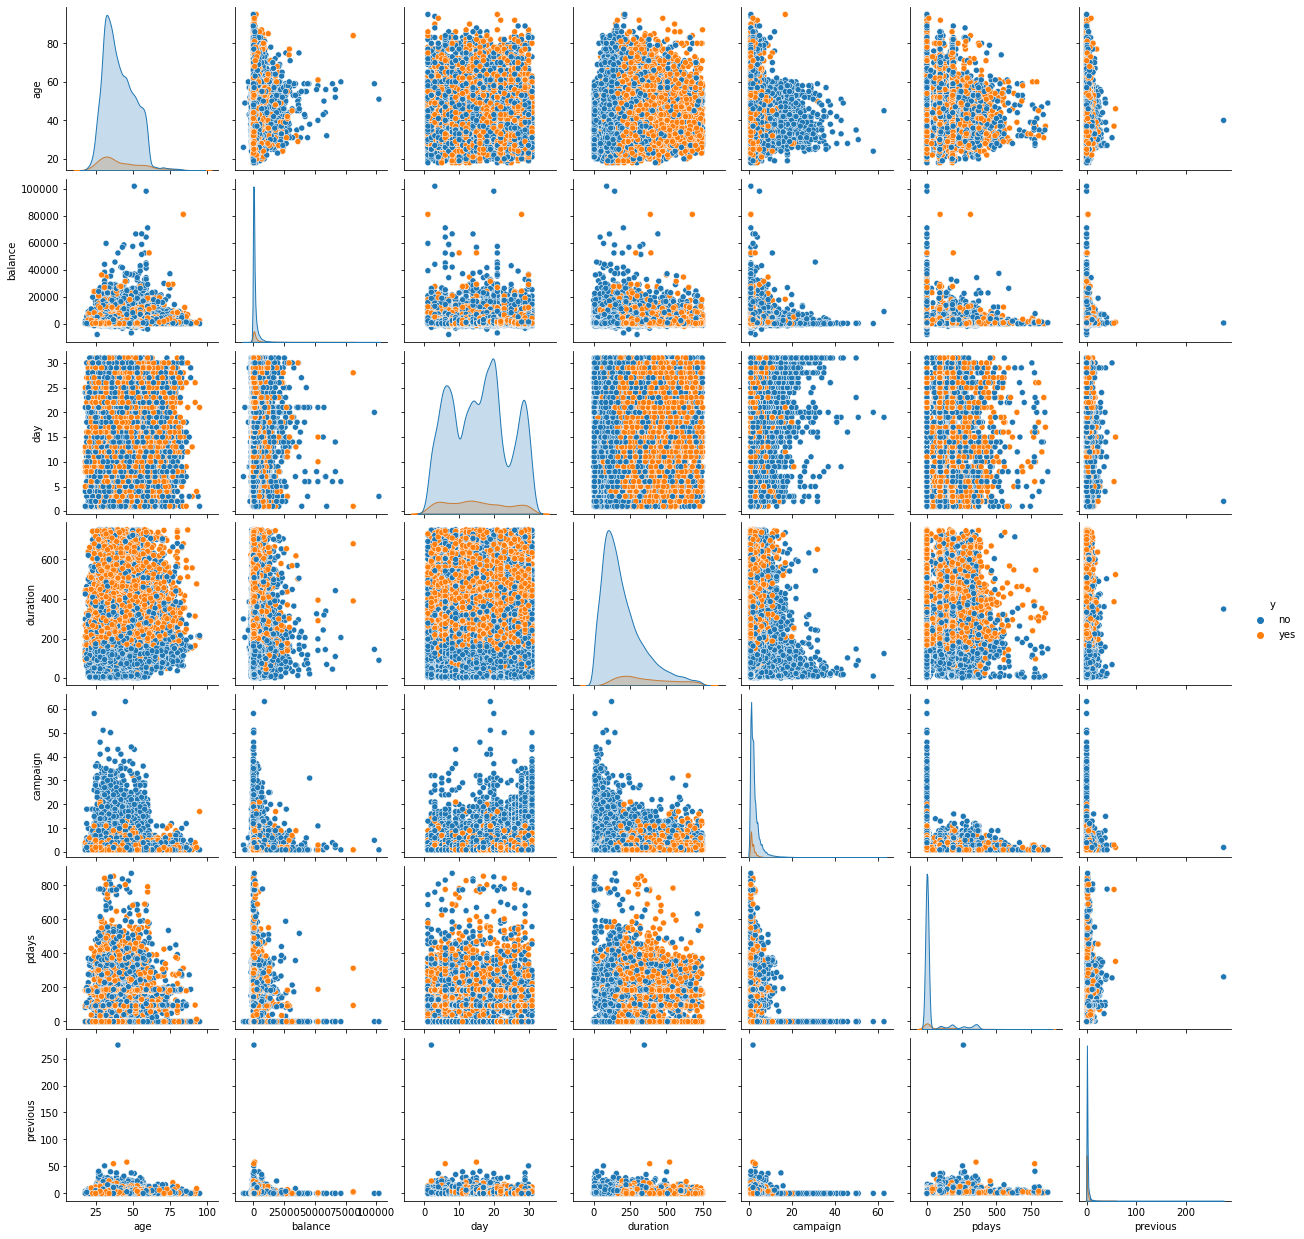

In [194]:
sns.pairplot(df_new, hue = 'y')

### 5. Correlation Analysis

#### Range: [-1, 1]

- No correlation r=0
- Very weak correlation: r<20
- Weak correlation: between 0.20-0.49
- Moderate correlation: between 0.5-0.79
- Strong correlation: between 0.8-0.99
- Perfect correlation: r=1

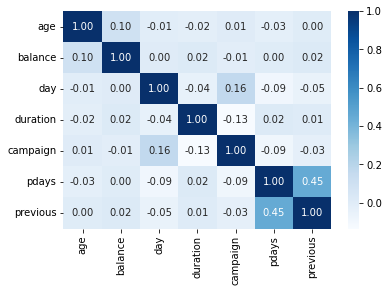

In [50]:
sns.heatmap(df_new[list].corr(), annot = True, cmap='Blues', fmt = ".2f")
plt.show()

In [51]:
df_new.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097108,-0.008815,-0.016181,0.006197,-0.025227,0.000194
balance,0.097108,1.000000,0.004956,0.020258,-0.013796,0.002557,0.016905
day,-0.008815,0.004956,1.000000,-0.041825,0.163580,-0.093450,-0.051556
duration,-0.016181,0.020258,-0.041825,1.000000,-0.134541,0.016580,0.011052
campaign,0.006197,-0.013796,0.163580,-0.134541,1.000000,-0.089242,-0.032184
pdays,-0.025227,0.002557,-0.093450,0.016580,-0.089242,1.000000,0.450749
previous,0.000194,0.016905,-0.051556,0.011052,-0.032184,0.450749,1.000000


In [52]:
# Replacing outcomes into binary values, i.e. 1 & 0
df_new['y'] = df_new['y'].replace('yes', 1)
df_new['y'] = df_new['y'].replace('no', 0)

In [53]:
# After replacing the values
df_new['y']

0        0
1        0
2        0
3        0
4        0
        ..
45204    1
45205    1
45207    1
45209    0
45210    0
Name: y, Length: 42949, dtype: int64

In [54]:
# pairwise correlation of columns
y_corr = df_new.corr()['y']
pd.DataFrame(y_corr)

,y
age,0.030083
balance,0.054830
day,-0.031927
duration,0.306023
campaign,-0.079359
pdays,0.122584
previous,0.105955
y,1.000000


### 6. Feature Engineering

In [55]:
df_new["job"] = df_new["job"].astype(str)
df_new["marital"] = df_new["marital"].astype(str)
df_new["education"] = df_new["education"].astype(str)
df_new["contact"] = df_new["contact"].astype(str)
df_new["month"] = df_new["month"].astype(str)
df_new["poutcome"] = df_new["poutcome"].astype(str)
df_new["housing"] = df_new["housing"].astype(str)
df_new["loan"] = df_new["loan"].astype(str)

number = preprocessing.LabelEncoder()

df_new["job"] = number.fit_transform(df_new["job"])
df_new["marital"] = number.fit_transform(df_new["marital"])
df_new["education"] = number.fit_transform(df_new["education"])
df_new["default"] = number.fit_transform(df_new["default"])
df_new["contact"] = number.fit_transform(df_new["contact"])
df_new["month"] = number.fit_transform(df_new["month"])
df_new["poutcome"] = number.fit_transform(df_new["poutcome"])
df_new["housing"] = number.fit_transform(df_new["housing"])
df_new["loan"] = number.fit_transform(df_new["loan"])

#### Sklearn provides a very efficient tool for encoding the levels of a categorical features into numeric values. LabelEncoder encode labels with value between 0 and n_classes-1

In [56]:
df_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,1,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,1,2,1,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0,1
45205,25,9,2,1,0,505,0,1,0,17,9,386,2,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [57]:
# Selecting feature columns
x = df_new.drop(columns = 'y')
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,1,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,1,2,1,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0
45205,25,9,2,1,0,505,0,1,0,17,9,386,2,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [58]:
# Selecting the label column
y = df_new['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
45204    1
45205    1
45207    1
45209    0
45210    0
Name: y, Length: 42949, dtype: int64

In [59]:
# Checking the Multicollinearity with the help of Variance Inflation Factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [60]:
print(vif_data)

      feature        VIF
0         age  12.507148
1         job   2.825560
2     marital   4.735263
3   education   4.174020
4     default   1.030569
5     balance   1.236086
6     housing   2.541948
7        loan   1.207563
8     contact   2.010686
9         day   4.605393
10      month   5.254100
11   duration   2.856576
12   campaign   1.900442
13      pdays   3.184882
14   previous   1.378663
15   poutcome  18.553888


#### Age, and poutcome has VIF more than 10, which shows high correation between feature columns.

<AxesSubplot:>

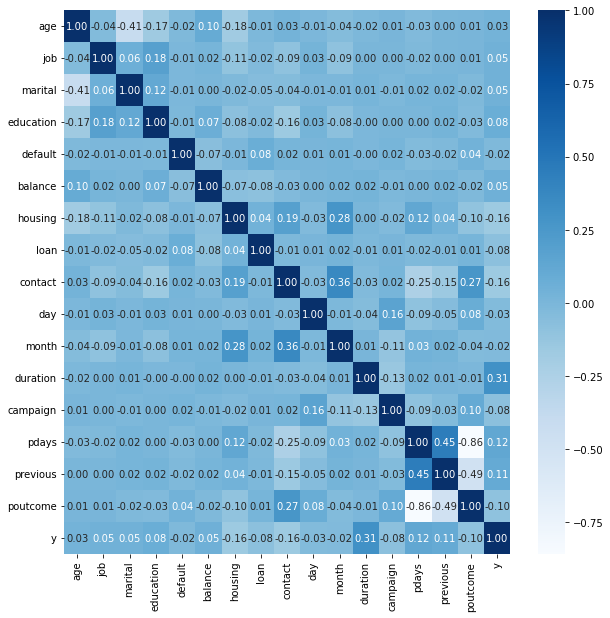

In [61]:
# Heatmap to represent the correlation between the feature columns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_new[list].corr(), annot = True, cmap='Blues', fmt = ".2f", ax=ax)

## Train - Test Split

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

In [85]:
x_train.shape, y_train.shape

((34359, 16), (34359,))

In [86]:
x_test.shape, y_test.shape

((8590, 16), (8590,))

In [87]:
# Applying the standard scaler on feature columns
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [88]:
x_train

array([[ 0.67236336, -1.01208583, -0.27596626, ..., -0.41203002,
        -0.23923042,  0.44583491],
       [-0.36970183, -1.32076505, -0.27596626, ..., -0.41203002,
        -0.23923042,  0.44583491],
       [-0.46443503,  1.4573479 ,  1.36706348, ..., -0.41203002,
        -0.23923042,  0.44583491],
       ...,
       [ 0.86182975, -0.08604818, -0.27596626, ..., -0.41203002,
        -0.23923042,  0.44583491],
       [ 1.71442854, -1.01208583, -0.27596626, ..., -0.41203002,
        -0.23923042,  0.44583491],
       [ 1.43022895,  1.4573479 , -0.27596626, ..., -0.41203002,
        -0.23923042,  0.44583491]])

In [89]:
x_test

array([[-1.02867688, -0.69014522, -0.27079446, ..., -0.41528346,
        -0.31780741,  0.45056709],
       [-0.65546571, -1.3056298 ,  1.39191062, ...,  0.91545594,
         1.84668467, -2.58501824],
       [-1.12197968, -0.99788751, -0.27079446, ..., -0.41528346,
        -0.31780741,  0.45056709],
       ...,
       [-0.56216291, -1.3056298 ,  1.39191062, ..., -0.41528346,
        -0.31780741,  0.45056709],
       [ 0.46416782,  0.54082393, -0.27079446, ..., -0.41528346,
        -0.31780741,  0.45056709],
       [-0.84207129, -1.3056298 , -0.27079446, ..., -0.41528346,
        -0.31780741,  0.45056709]])

In [90]:
# Dataframe after standard scaler
df_new_scaler = pd.DataFrame(scaler.fit_transform(df_new))
df_new_scaler

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.612381,-0.083764,-0.274937,1.316802,-0.136535,0.257847,0.895548,-0.437802,1.510910,-1.297268,0.824315,0.295246,-0.567080,-0.412657,-0.250498,0.446775,-0.322934
1,0.290209,1.458676,1.371963,-0.218359,-0.136535,-0.433211,0.895548,-0.437802,1.510910,-1.297268,0.824315,-0.404516,-0.567080,-0.412657,-0.250498,0.446775,-0.322934
2,-0.748640,-0.700740,-0.274937,-0.218359,-0.136535,-0.442037,0.895548,2.284138,1.510910,-1.297268,0.824315,-0.881626,-0.567080,-0.412657,-0.250498,0.446775,-0.322934
3,0.573532,-1.009228,-0.274937,-0.218359,-0.136535,0.049614,0.895548,-0.437802,1.510910,-1.297268,0.824315,-0.779842,-0.567080,-0.412657,-0.250498,0.446775,-0.322934
4,-0.748640,-1.009228,1.371963,-0.218359,-0.136535,-0.442364,-1.116635,-0.437802,1.510910,-1.297268,0.824315,-0.105527,-0.567080,-0.412657,-0.250498,0.446775,-0.322934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42944,3.028994,0.224724,-0.274937,-0.218359,-0.136535,0.488962,-1.116635,-0.437802,-0.714813,0.141452,1.156970,0.543343,-0.567080,-0.004720,3.186773,-2.573457,3.096612
42945,-1.504166,1.458676,1.371963,-0.218359,-0.136535,-0.277608,-1.116635,2.284138,-0.714813,0.141452,1.156970,1.090429,-0.246693,-0.412657,-0.250498,0.446775,3.096612
42946,2.840112,0.224724,-1.921837,-1.753520,-0.136535,0.122512,-1.116635,-0.437802,-0.714813,0.141452,1.156970,1.535732,-0.246693,-0.412657,-0.250498,0.446775,3.096612
42947,1.517940,-1.009228,-0.274937,-0.218359,-0.136535,-0.224324,-1.116635,-0.437802,0.398048,0.141452,1.156970,1.866528,0.394082,-0.412657,-0.250498,0.446775,-0.322934


<AxesSubplot:>

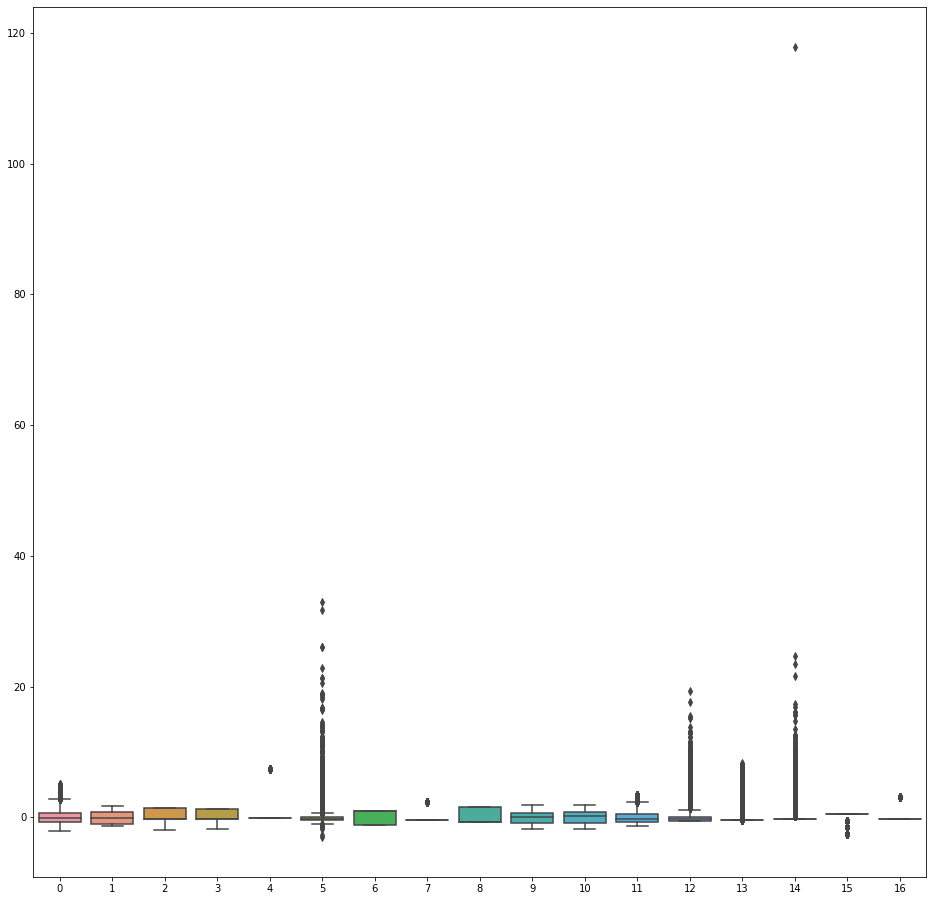

In [91]:
# Boxplot to represent the outliers in the dataset after applying standard scaler 
fig, ax = plt.subplots(figsize = (16,16))
sns.boxplot(data = df_new_scaler, ax = ax)

In [92]:
# Varience Inflation Factor after using standard scaler
def vif_score(x):
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(x_scaled, i)] for i in range(x_scaled.shape[1])],
                        columns=["FEATURE", "VIF_SCORE"])

In [93]:
vif_score(x)

,FEATURE,VIF_SCORE
0,age,1.299024
1,job,1.051364
2,marital,1.219557
3,education,1.099720
4,default,1.011915
5,balance,1.033594
6,housing,1.185109
7,loan,1.019080
8,contact,1.334119
9,day,1.040217


#### After using standard scaler, VIF is less than 10 for all the columns and it has removed most of the outliers as well. Now, the dataset is good to go for the model building.

<AxesSubplot:>

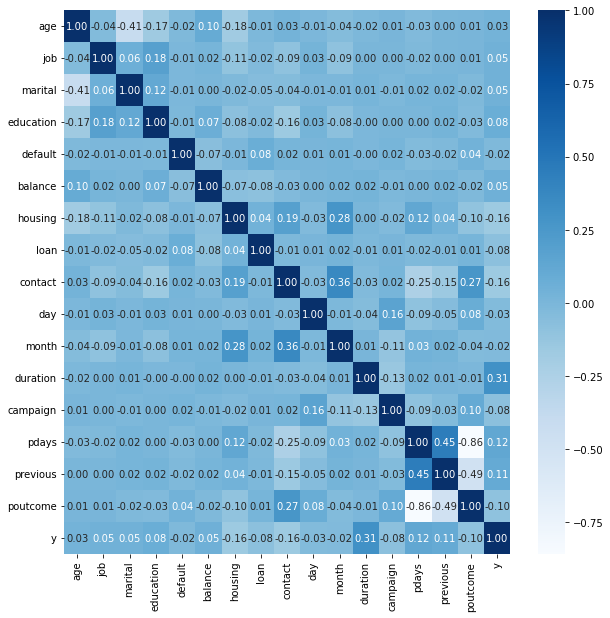

In [94]:
# Heatmap to show the correalation between feature columns after using standard scaler
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_new[list].corr(), annot = True, cmap='Blues', fmt = ".2f", ax=ax)

#### None of the features is correlated with "y" ( target class), thus combination of features will be used.

### Training the model

In [95]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

### 7. Grid Search/Modeling

In [78]:
param = ({'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
        'C':[(10**i)*x for i in range(-4, 1) for x in [1,3,5]],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'lbfgs'],
          'max_iter' : [100,1000,2500, 5000]
})
clf = GridSearchCV(model, param_grid=param, cv=5, verbose=True, n_jobs=-1)
clf.fit(x_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_)) # Finding the best parameter
print('Best score: {}'.format(clf.best_score_)) # Finding the best score

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Best parameters:  {'C': 0.003, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.908088134758138


### Training Logistic Regression with best parameters

In [96]:
model = LogisticRegression(C= 0.003, max_iter= 100, penalty= 'l2', solver= 'liblinear')

In [97]:
model.fit(x_train, y_train)

LogisticRegression(C=0.003, solver='liblinear')

### 8. Regression Analysis/Predictions

In [98]:
model.score(x_test, y_test)

0.9047729918509895

In [99]:
pred = model.predict(x_test)

In [100]:
print(accuracy_score(y_test, pred))
print(recall_score(y_test, pred))
print(precision_score(y_test, pred))
print(f1_score(y_test, pred))
print(roc_auc_score(y_test, pred))

0.9047729918509895
0.11355311355311355
0.5027027027027027
0.18525896414342627
0.5508571126895667


In [101]:
# confusion matrix
cm = confusion_matrix(y_test, pred)
cm

array([[7679,   92],
       [ 726,   93]], dtype=int64)

<AxesSubplot:>

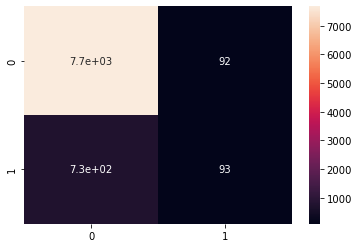

In [102]:
sns.heatmap(cm, annot=True)

In [103]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7771
           1       0.50      0.11      0.19       819

    accuracy                           0.90      8590
   macro avg       0.71      0.55      0.57      8590
weighted avg       0.87      0.90      0.88      8590



In [104]:
# Storing the model
file = 'logistic_reg.sav'
pickle.dump(model, open(file,'wb'))

# XgBoost

In [106]:
# importing xgboost
import optuna
import xgboost as xgb

In [108]:
# Train - Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = .20 )

In [109]:
# Applying the standard scaler on feature columns
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [110]:
xgb_classification = xgb.XGBClassifier()
xgb_classification.fit(x_train , y_train, eval_set  = [(x_test, y_test)])

[18:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.50125
[1]	validation_0-logloss:0.39521
[2]	validation_0-logloss:0.33054
[3]	validation_0-logloss:0.28869
[4]	validation_0-logloss:0.25947
[5]	validation_0-logloss:0.23996
[6]	validation_0-logloss:0.22704
[7]	validation_0-logloss:0.21828
[8]	validation_0-logloss:0.21187
[9]	validation_0-logloss:0.20625
[10]	validation_0-logloss:0.20183
[11]	validation_0-logloss:0.19832
[12]	validation_0-logloss:0.19568
[13]	validation_0-logloss:0.19324
[14]	validation_0-logloss:0.19182
[15]	validation_0-logloss:0.18852
[16]	validation_0-logloss:0.18707
[17]	validation_0-logloss:0.18607
[18]	validation_0-logloss:0.18516
[19]	validation_0-logloss:0.18465
[20]	validation_0-lo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [111]:
def objective_classification(trial):
    
    param  = {
        'verbosity' : 3, 
        'booster' : trial.suggest_categorical('booster' , ['dart' , 'gbtree','gblinear']),
        'lambda' : trial.suggest_float('lambda' , 1e-4 , 1),
        'alpha' :trial.suggest_float('alpha' , 1e-4 , 1),
        'subsample' : trial.suggest_float('subsample' , .1,.5),
        'colsample_bytree' : trial.suggest_float('colsample_bytree' , .1 ,.5)
        
    }
   
    if param['booster'] in ['gbtree' , 'dart']:
        param['gamma'] :trial.suggest_float('gamma' , 1e-3 , 4 )
        param['eta'] : trial.suggest_float('eta' , .001 ,5 )
        
    xgb_classification = xgb.XGBClassifier(**param)
    xgb_classification.fit(x_train, y_train, eval_set  = [(x_test, y_test)])
    pred = xgb_classification.predict(x_test)
    accuracy  = xgb_classification.score(x_test, y_test)

    return accuracy

In [112]:
xgb_classification_oputuna = optuna.create_study(direction  = 'minimize')
xgb_classification_oputuna.optimize(objective_classification , n_trials = 10 )

[I 2022-04-19 19:02:11,566] A new study created in memory with name: no-name-16b63779-4ef1-43fc-8ebd-215a7a3d57d1


[19:02:11] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:155: Using tree method: 2
[19:02:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[19:02:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[19:02:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.50710
[19:02:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[19:02:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_re

[19:02:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[19:02:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[48]	validation_0-logloss:0.19103
[19:02:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[19:02:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[49]	validation_0-logloss:0.19050
[19:02:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[19:02:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[50]	validation_0-logloss:0.19043
[19:02:

[19:02:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[19:02:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[73]	validation_0-logloss:0.19194
[19:02:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[19:02:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[74]	validation_0-logloss:0.19156
[19:02:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[19:02:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[75]	validation_0-logloss:0.19173
[19:02:

[19:02:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[19:02:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[98]	validation_0-logloss:0.19416
[19:02:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[19:02:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[99]	validation_0-logloss:0.19498
[19:02:29] ======== Monitor (0): Learner ========
[19:02:29] Configure: 0s, 1 calls @ 0us

[19:02:29] EvalOneIter: 3.76826s, 100 calls @ 3768265us

[19:02:29] GetGradient: 0.050097s, 100 calls @ 50097us

[19:02:29] PredictRaw: 11.3402s, 100 calls @ 11340232us

[19:02:29] UpdateOneIter: 13.4508s, 100 calls @ 13450839us

[19:02:29] ======

[I 2022-04-19 19:02:30,145] Trial 0 finished with value: 0.919790454016298 and parameters: {'booster': 'dart', 'lambda': 0.9909912021125057, 'alpha': 0.5800024248024723, 'subsample': 0.21860584374763992, 'colsample_bytree': 0.3041209501812845}. Best is trial 0 with value: 0.919790454016298.


[19:02:30] ======== Monitor (0): Learner ========
[19:02:30] Configure: 0.000907s, 1 calls @ 907us

[19:02:30] ======== Monitor (0): GBTree ========
[19:02:30] ======== Monitor (0): TreePruner ========
[19:02:30] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:155: Using tree method: 2
[19:02:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[19:02:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[19:02:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.50601
[19:02:30] INFO: C:/Users/Administr

[22]	validation_0-logloss:0.19318
[19:02:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[19:02:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[23]	validation_0-logloss:0.19179
[19:02:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[19:02:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[24]	validation_0-logloss:0.19159
[19:02:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[19:02:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[25]	va

[47]	validation_0-logloss:0.18477
[19:02:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[19:02:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[48]	validation_0-logloss:0.18482
[19:02:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 102 extra nodes, 0 pruned nodes, max_depth=6
[19:02:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[49]	validation_0-logloss:0.18451
[19:02:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[19:02:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[50]	v

[19:02:40] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[19:02:40] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[73]	validation_0-logloss:0.18474
[19:02:40] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[19:02:40] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[74]	validation_0-logloss:0.18454
[19:02:40] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[19:02:40] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[75]	validation_0-logloss:0.18489
[19:02:

[19:02:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[19:02:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[98]	validation_0-logloss:0.18467
[19:02:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[19:02:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[99]	validation_0-logloss:0.18488
[19:02:47] ======== Monitor (0): Learner ========
[19:02:47] Configure: 0.001449s, 1 calls @ 1449us

[19:02:47] EvalOneIter: 3.57482s, 100 calls @ 3574823us

[19:02:47] GetGradient: 0.046455s, 100 calls @ 46455us

[19:02:47] PredictRaw: 10.8616s, 100 calls @ 10861552us

[19:02:47] UpdateOneIter: 13.1837s, 100 calls @ 13183707us

[19:02:

[I 2022-04-19 19:02:48,094] Trial 1 finished with value: 0.9203725261932479 and parameters: {'booster': 'dart', 'lambda': 0.07767255522368254, 'alpha': 0.7793528053492875, 'subsample': 0.4383623987689663, 'colsample_bytree': 0.26139593512643367}. Best is trial 0 with value: 0.919790454016298.


[19:02:48] ======== Monitor (0): Learner ========
[19:02:48] Configure: 0.000779s, 1 calls @ 779us

[19:02:48] ======== Monitor (0): GBTree ========
[19:02:48] ======== Monitor (0): TreePruner ========
[19:02:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:02:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.44343
[1]	validation_0-

[I 2022-04-19 19:02:49,033] Trial 2 finished with value: 0.9067520372526193 and parameters: {'booster': 'gblinear', 'lambda': 0.5448026003320662, 'alpha': 0.8260884437267874, 'subsample': 0.15790042413700595, 'colsample_bytree': 0.4369117537681444}. Best is trial 2 with value: 0.9067520372526193.


[19:02:49] Configure: 0.000634s, 1 calls @ 634us

[19:02:49] ======== Monitor (0): GBLinear ========
[19:02:49] PredictBatch: 0.000531s, 2 calls @ 531us

[19:02:49] PredictBatchInternal: 0.000525s, 2 calls @ 525us

[19:02:49] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:155: Using tree method: 2
[19:02:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 106 extra nodes, 0 pruned nodes, max_depth=6
[19:02:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.50147
[19:02:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 102 extra nodes, 0 p

[36]	validation_0-logloss:0.18157
[19:02:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[37]	validation_0-logloss:0.18197
[19:02:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[38]	validation_0-logloss:0.18215
[19:02:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[39]	validation_0-logloss:0.18226
[19:02:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[40]	validation_0-logloss:0.18226
[19:02:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 p

[76]	validation_0-logloss:0.18407
[19:02:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[77]	validation_0-logloss:0.18442
[19:02:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[78]	validation_0-logloss:0.18406
[19:02:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=6
[79]	validation_0-logloss:0.18351
[19:02:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[80]	validation_0-logloss:0.18396
[19:02:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 96 extra nodes, 0 

[I 2022-04-19 19:02:52,660] Trial 3 finished with value: 0.9208381839348079 and parameters: {'booster': 'gbtree', 'lambda': 0.27549558688952147, 'alpha': 0.7163432018884065, 'subsample': 0.4198910001219943, 'colsample_bytree': 0.4657655616550408}. Best is trial 2 with value: 0.9067520372526193.


[19:02:52] Configure: 0.000919s, 1 calls @ 919us

[19:02:52] ======== Monitor (0): GBTree ========
[19:02:52] ======== Monitor (0): TreePruner ========
[19:02:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:02:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.44343
[1]	validation_0-logloss:0.36097
[2]	validation_0-logloss:0.32871
[

[I 2022-04-19 19:02:53,717] Trial 4 finished with value: 0.9067520372526193 and parameters: {'booster': 'gblinear', 'lambda': 0.9880082807291181, 'alpha': 0.12824164135248878, 'subsample': 0.1944949083648206, 'colsample_bytree': 0.22648344241790866}. Best is trial 2 with value: 0.9067520372526193.



[19:02:53] Configure: 0.000764s, 1 calls @ 764us

[19:02:53] ======== Monitor (0): GBLinear ========
[19:02:53] PredictBatch: 0.000483s, 2 calls @ 483us

[19:02:53] PredictBatchInternal: 0.000477s, 2 calls @ 477us

[19:02:53] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:155: Using tree method: 2
[19:02:53] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[19:02:53] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[19:02:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.50704
[19:02:53] INFO: C:/U

[19:02:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[19:02:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[23]	validation_0-logloss:0.19074
[19:02:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[19:02:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[24]	validation_0-logloss:0.19016
[19:02:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[19:02:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[25]	validation_0-logloss:0.18987
[19:02:

[19:02:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=6
[19:02:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[48]	validation_0-logloss:0.19112
[19:02:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[19:02:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[49]	validation_0-logloss:0.19146
[19:02:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[19:02:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[50]	validation_0-logloss:0.19199
[19:02

[19:03:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[19:03:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[73]	validation_0-logloss:0.19508
[19:03:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[19:03:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[74]	validation_0-logloss:0.19496
[19:03:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[19:03:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[75]	validation_0-logloss:0.19554
[19:03:

[19:03:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[19:03:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[98]	validation_0-logloss:0.19804
[19:03:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[19:03:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[99]	validation_0-logloss:0.19863
[19:03:10] ======== Monitor (0): Learner ========
[19:03:10] Configure: 0.001439s, 1 calls @ 1439us

[19:03:10] EvalOneIter: 3.44468s, 100 calls @ 3444684us

[19:03:10] GetGradient: 0.08102s, 100 calls @ 81020us

[19:03:10] PredictRaw: 10.7231s, 100 calls @ 10723122us

[19:03:10] UpdateOneIter: 12.9838s, 100 calls @ 12983838us

[19:03:1

[I 2022-04-19 19:03:11,434] Trial 5 finished with value: 0.9155995343422585 and parameters: {'booster': 'dart', 'lambda': 0.9086250900333159, 'alpha': 0.4694773414901403, 'subsample': 0.195409385280015, 'colsample_bytree': 0.41969235085317214}. Best is trial 2 with value: 0.9067520372526193.


[19:03:11] ======== Monitor (0): Learner ========
[19:03:11] Configure: 0.000852s, 1 calls @ 852us

[19:03:11] ======== Monitor (0): GBTree ========
[19:03:11] ======== Monitor (0): TreePruner ========
[19:03:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:03:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.44343
[1]	validation_0-

[I 2022-04-19 19:03:12,486] Trial 6 finished with value: 0.9067520372526193 and parameters: {'booster': 'gblinear', 'lambda': 0.8551199087402432, 'alpha': 0.7304744761686964, 'subsample': 0.16662740857075278, 'colsample_bytree': 0.16441346356099523}. Best is trial 2 with value: 0.9067520372526193.



[19:03:12] Configure: 0.000577s, 1 calls @ 577us

[19:03:12] ======== Monitor (0): GBLinear ========
[19:03:12] PredictBatch: 0.000583s, 2 calls @ 583us

[19:03:12] PredictBatchInternal: 0.000579s, 2 calls @ 579us

[19:03:12] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:155: Using tree method: 2
[19:03:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[19:03:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[19:03:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.52057
[19:03:12] INFO: C:/Us

[19:03:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:03:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[23]	validation_0-logloss:0.20873
[19:03:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[19:03:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[24]	validation_0-logloss:0.20899
[19:03:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[19:03:13] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[25]	validation_0-logloss:0.20879
[19:03:1

[47]	validation_0-logloss:0.20069
[19:03:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[19:03:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[48]	validation_0-logloss:0.20034
[19:03:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[19:03:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[49]	validation_0-logloss:0.20001
[19:03:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:03:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[50]	val

[19:03:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=4
[19:03:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[73]	validation_0-logloss:0.19482
[19:03:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[19:03:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[74]	validation_0-logloss:0.19458
[19:03:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[19:03:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[75]	validation_0-logloss:0.19455
[19:03:2

[19:03:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[19:03:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[98]	validation_0-logloss:0.19891
[19:03:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[19:03:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[99]	validation_0-logloss:0.19887
[19:03:29] ======== Monitor (0): Learner ========
[19:03:29] Configure: 0.001467s, 1 calls @ 1467us

[19:03:29] EvalOneIter: 3.65125s, 100 calls @ 3651253us

[19:03:29] GetGradient: 0.050753s, 100 calls @ 50753us

[19:03:29] PredictRaw: 11.4455s, 100 calls @ 11445502us

[19:03:29] UpdateOneIter: 13.1177s, 100 calls @ 13117692us

[19:03:

[I 2022-04-19 19:03:30,622] Trial 7 finished with value: 0.920023282887078 and parameters: {'booster': 'dart', 'lambda': 0.0034437570411398853, 'alpha': 0.6681823266810568, 'subsample': 0.11391453181913636, 'colsample_bytree': 0.13703861826538444}. Best is trial 2 with value: 0.9067520372526193.


[19:03:30] ======== Monitor (0): Learner ========
[19:03:30] Configure: 0.001348s, 1 calls @ 1348us

[19:03:30] ======== Monitor (0): GBTree ========
[19:03:30] ======== Monitor (0): TreePruner ========
[19:03:30] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:155: Using tree method: 2
[19:03:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:03:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[19:03:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.52123
[19:03:30] INFO: C:/Users/Administr

[19:03:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[19:03:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[23]	validation_0-logloss:0.23423
[19:03:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:03:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[24]	validation_0-logloss:0.23421
[19:03:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[19:03:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[25]	validation_0-logloss:0.23448
[19:03:32

[19:03:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[19:03:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[48]	validation_0-logloss:0.21526
[19:03:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[19:03:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[49]	validation_0-logloss:0.21447
[19:03:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:03:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[50]	validation_0-logloss:0.21451
[19:03:3

[19:03:39] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:03:39] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[73]	validation_0-logloss:0.20622
[19:03:39] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[19:03:39] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[74]	validation_0-logloss:0.20602
[19:03:40] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[19:03:40] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[75]	validation_0-logloss:0.20619
[19:03:40

[19:03:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[19:03:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[98]	validation_0-logloss:0.20613
[19:03:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[19:03:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[99]	validation_0-logloss:0.20575
[19:03:46] ======== Monitor (0): Learner ========
[19:03:46] Configure: 0.001682s, 1 calls @ 1682us

[19:03:46] EvalOneIter: 3.37107s, 100 calls @ 3371071us

[19:03:46] GetGradient: 0.059505s, 100 calls @ 59505us

[19:03:46] PredictRaw: 10.3507s, 100 calls @ 10350674us

[19:03:46] UpdateOneIter: 11.6998s, 100 calls @ 11699783us

[19:03:

[I 2022-04-19 19:03:47,013] Trial 8 finished with value: 0.9194412107101281 and parameters: {'booster': 'dart', 'lambda': 0.8086559737959467, 'alpha': 0.7955194099691343, 'subsample': 0.1149946745110424, 'colsample_bytree': 0.12490761775713866}. Best is trial 2 with value: 0.9067520372526193.


[19:03:47] ======== Monitor (0): Learner ========
[19:03:47] Configure: 0.001262s, 1 calls @ 1262us

[19:03:47] ======== Monitor (0): GBTree ========
[19:03:47] ======== Monitor (0): TreePruner ========
[19:03:47] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:155: Using tree method: 2
[19:03:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 106 extra nodes, 0 pruned nodes, max_depth=6
[19:03:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[19:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.50444
[19:03:47] INFO: C:/Users/Adminis

[19:03:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[19:03:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[23]	validation_0-logloss:0.18590
[19:03:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[19:03:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[24]	validation_0-logloss:0.18589
[19:03:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[19:03:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[25]	validation_0-logloss:0.18497
[19:03:

[47]	validation_0-logloss:0.18055
[19:03:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[19:03:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[48]	validation_0-logloss:0.18103
[19:03:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 102 extra nodes, 0 pruned nodes, max_depth=6
[19:03:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[49]	validation_0-logloss:0.18117
[19:03:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[19:03:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[50]	v

[19:03:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[19:03:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[73]	validation_0-logloss:0.18296
[19:03:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[19:03:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[74]	validation_0-logloss:0.18291
[19:03:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[19:03:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[75]	validation_0-logloss:0.18317
[19:03:

[19:04:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[19:04:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[98]	validation_0-logloss:0.18497
[19:04:05] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[19:04:05] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[99]	validation_0-logloss:0.18550
[19:04:05] ======== Monitor (0): Learner ========
[19:04:05] Configure: 0.001425s, 1 calls @ 1425us

[19:04:05] EvalOneIter: 3.62904s, 100 calls @ 3629040us

[19:04:05] GetGradient: 0.050601s, 100 calls @ 50601us

[19:04:05] PredictRaw: 11.229s, 100 calls @ 11228962us

[19:04:05] UpdateOneIter: 14.0377s, 100 calls @ 14037715us

[19:04:0

[I 2022-04-19 19:04:06,092] Trial 9 finished with value: 0.9213038416763679 and parameters: {'booster': 'dart', 'lambda': 0.6027633142743293, 'alpha': 0.7697814832322082, 'subsample': 0.411442981167113, 'colsample_bytree': 0.4080858552692843}. Best is trial 2 with value: 0.9067520372526193.


[19:04:06] ======== Monitor (0): Learner ========
[19:04:06] Configure: 0.000927s, 1 calls @ 927us

[19:04:06] ======== Monitor (0): GBTree ========
[19:04:06] ======== Monitor (0): TreePruner ========


In [113]:
xgb_classification_oputuna.best_trial

FrozenTrial(number=2, values=[0.9067520372526193], datetime_start=datetime.datetime(2022, 4, 19, 19, 2, 48, 96704), datetime_complete=datetime.datetime(2022, 4, 19, 19, 2, 49, 32304), params={'booster': 'gblinear', 'lambda': 0.5448026003320662, 'alpha': 0.8260884437267874, 'subsample': 0.15790042413700595, 'colsample_bytree': 0.4369117537681444}, distributions={'booster': CategoricalDistribution(choices=('dart', 'gbtree', 'gblinear')), 'lambda': UniformDistribution(high=1.0, low=0.0001), 'alpha': UniformDistribution(high=1.0, low=0.0001), 'subsample': UniformDistribution(high=0.5, low=0.1), 'colsample_bytree': UniformDistribution(high=0.5, low=0.1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=2, state=TrialState.COMPLETE, value=None)

In [114]:
xgb_classification_oputuna.best_params

{'booster': 'gblinear',
 'lambda': 0.5448026003320662,
 'alpha': 0.8260884437267874,
 'subsample': 0.15790042413700595,
 'colsample_bytree': 0.4369117537681444}

In [115]:
param = xgb_classification_oputuna.best_params

In [116]:
xgb_final_class = xgb.XGBClassifier(**param)

In [117]:
xgb_final_class.fit(x_train, y_train)

[19:06:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:06:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:06:23] ======== Monitor (0): Learner ========
[19:06:23] Configure: 0.001435s, 1 calls @ 1435us

[19:06:23] EvalOneIter: 0.001253s, 100 calls @ 1253us

[19:06:23] GetGradient: 0.048256s, 100 calls @ 48256us

[19:06:23] PredictRaw: 0.091179s, 100 ca

XGBClassifier(alpha=0.8260884437267874, base_score=0.5, booster='gblinear',
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4369117537681444, enable_categorical=False,
              gamma=None, gpu_id=-1, importance_type=None,
              interaction_constraints=None, lambda=0.5448026003320662,
              learning_rate=0.5, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=8, num_parallel_tree=None,
              predictor=None, random_state=0, reg_alpha=0, reg_lambda=0,
              scale_pos_weight=1, subsample=0.15790042413700595,
              tree_method=None, validate_parameters=1, verbosity=None)

In [118]:
xgb_final_class.score(x_test, y_test)

0.9067520372526193

### 9. Conclusion

- The dataset consists of categorical and numerical features.
- The dataset has 16 independent features, out of these only half of them are important.
- People who are under 36 are more likely to subscribe to the term deposit of the bank.
- People who have some kind of loan i.e., personal or house loan are unlikely to subscribe.
- Education plays an important role, as management, technician, blue-collar and admin professionals are more likely to subscribe.
- Most of the people who subscribed to the term deposit spent more than 10 minutes on the call.
- Married people seemed more interested in term deposits, unlike divorced people.
- During May, July and August, most people subscribed to the term deposit. Hence, the targeted audience should be addressed during the summer.
- Most people made up their minds within the next 3 months after the last campaign.
- The targeted audience should be contacted at least 3 times.